# **MVP Análise de Dados e Boas Práticas**

**Nome:** Eduardo Henrique de Souza Mendes

**Matrícula:** 4052025000187

**Dataset:**
Para resolução do problema e suas hipóteses, trabalha-se com dados relacionados a pandemia da COVID-19 com origem no site [Our World in Data](https://ourworldindata.org/).


# **1 - Descrição do Problema**
O conjunto de dados é um conjunto de dados multivariado que consiste em dados relacionados à morte por COVID-19.
O objetivo principal é identificar o grau de mortalidade pela COVID-19, com base em cinco características combinadas: Data, Política de afastamento, Vacinação, Quantidade de Casos.

## **1.1 - Hipóteses do Problema**

As hipóteses traçadas são as seguintes:

- A quantidade de mortes por COVID-19, pode ser relacionada à política de afastamento determinada pelos governos das localicades?

- Existe uma correlação uniforme entre a quantidade de casos e mortes nas diversas localidades? Ou Seja, houva alguma disparidade que pudesse justificar que um país tenha aplicado alguma medida de tratamento mais eficaz que outro?

- Existe uma correlação entre a quantidade de vacinas aplicadas e a redução de mortes?

## **1.2 - Tipo de Problema**

Este é um problema de **classificação supervisionada**. Dado um conjunto de dados relacionados à pandemia da COVID-19 (Localidade, Data , Novos Casos(dia), Novas de Mortes(dia), Vacinas Aplicadas(dia),Escolas Fechadas, Local de trabalho Fechado, Fique em Casa e Uso de Máscara). O objetivo determinar a relação entre as medidas adotadas para a prevenção e o avanço do número de casos e mortes.

## **1.3 - Seleção de Dados**
Os dados estão disponíveis em (https://docs.owid.io/projects/etl/api/covid/#download-data) e podem ser importados com a biblioteca Python fornecida pelo próprio site. Será necessário ajuste para que se torne viável o trabalho nas hipóteses e resolução dos problemas.


## **1.4 - Atributos do Dataset Final (Após concatenação das origens)**

O dataset Covid-reduced contém 4480 amostras, com dados das seguintes localidades: Brasil, China, Europa, Índia e Estados Unidos e possui oito atributos:

- ***country*** : Nome da localidade ou país.
- ***date*** : A data to evento.
- ***new_cases*** : Casos por dia
- ***new_deaths*** :  Mortes por dia
- ***taxa_mortalidade***: Mortes / Casos dia
- ***c1m_school_closing*** : Escolas fechadas, variando de zero (sem restrição) a três (restrição máxima)
- ***c2m_workplace_closing*** : Local de trabalho fechado, variando de zero (sem restrição) a três (restrição máxima)
- ***c6m_stay_at_home_requirements*** : Fique em casa, variando de zero (sem restrição) a três (restrição máxima).
- ***h6m_facial_coverings*** : Uso de máscara, ariando de zero (sem restrição) a quatro (restrição máxima).


# **2 - Importação das Bibliotecas Necessárias e Carga de dados**

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, carregamento e formatação do dos dataset iniciais

## **2.1 - Instalação de pacotes**

In [ ]:
!pip install pandasql
!pip install owid-catalog

## **2.2 - Importação de bibliotecas**

In [ ]:
#importando bibliotecas
from owid import catalog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.dates as mdates

## **2.3 - Coleta de Dados**


Esta seção consolida a carga dos datasets originais.

In [ ]:
rc = catalog.RemoteCatalog()
df_politica = rc["garden/covid/latest/oxcgrt_policy/oxcgrt_policy"]
df_politica_meta = df_politica.metadata
df_casos_mortes = rc["garden/covid/latest/cases_deaths/cases_deaths"]
df_casos_mortes_meta = df_casos_mortes.metadata
df_vacinas = rc["garden/covid/latest/vaccinations_global/vaccinations_global"]
df_vacinas_meta = df_vacinas.metadata


##**2.4 - Criação do dataset**
Os dados sobre a pandemia da Covid-19 fornecido pelo site Our World in Data, são subdivididos em vários temas, durante a pesquisa não consegui idealizar nenhum que tivesse todas as informações que idealmente eu imaginei para o MVP.
Desta forma fiz a coleta de algumas tabelas para que eu pudesse aproveitar somente alguns campos e por fim concatená-los de forma que fiquem como descrito na seção 1.4

### 2.4.1 - Redução da tabela Casos e Mortes.

Aqui, busca-de coletar somente a quantidade de **Novos Casos** e **Novas Mortes**, porém no dataset pode ser observado outros dados, como por exemplo: casos por semana, crescimento dos casos, etc.
Abaixo será feito a tratativa de remoção desses campos.

In [ ]:
#Mostranto atributos da tabela casos e mortes
print(df_casos_mortes.info())

2025-07-05 20:54:35 [warning  ] Different values of 'unit' detected among variables: {'cases per million people', '%', 'cases', 'deaths', 'deaths per 100,000 people', 'days', 'deaths per million people'} category=DifferentValuesWarning filename=/usr/local/lib/python3.11/dist-packages/owid/catalog/variables.py lineno=360
<class 'owid.catalog.tables.Table'>
MultiIndex: 495510 entries, ('Afghanistan', Timestamp('2020-01-04 00:00:00')) to ('Zimbabwe', Timestamp('2025-06-15 00:00:00'))
Data columns (total 38 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   new_cases                                492564 non-null  UInt32 
 1   total_cases                              495510 non-null  UInt32 
 2   new_deaths                               493352 non-null  UInt16 
 3   total_deaths                             495510 non-null  UInt32 
 4   weekly_cases                             491303 no

In [ ]:
# Reduzindo a tabela para que tenha somente novos casos e novas mortes.
df_casos_mortes = df_casos_mortes.loc[:, ['new_cases', 'new_deaths']]
df_casos_mortes.head()



new_cases  new_deaths
country     date                             
Afghanistan 2020-01-04          0           0
            2020-01-05          0           0
            2020-01-06          0           0
            2020-01-07          0           0
            2020-01-08          0           0

In [ ]:
# Descrição final da tabela Casos e mortes
print(f"Total de instâncias: {len(df_casos_mortes)}")
print("\nTipos de dados por coluna:")
print(df_casos_mortes.info())

Total de instâncias: 495510

Tipos de dados por coluna:
2025-07-05 20:54:35 [warning  ] Different values of 'unit' detected among variables: {'cases', 'deaths'} category=DifferentValuesWarning filename=/usr/local/lib/python3.11/dist-packages/owid/catalog/variables.py lineno=360
<class 'owid.catalog.tables.Table'>
MultiIndex: 495510 entries, ('Afghanistan', Timestamp('2020-01-04 00:00:00')) to ('Zimbabwe', Timestamp('2025-06-15 00:00:00'))
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cases   492564 non-null  UInt32
 1   new_deaths  493352 non-null  UInt16
dtypes: UInt16(1), UInt32(1)
memory usage: 5.8 MB
None


### 2.4.2 - Redução da tabela medidas de distanciamento

Aqui, busca-de coletar as principais medidas de distanciamento adotadas pelas diversas localidades, entretanto o data set traz alguns dados sobre vacinas e fabricantes que serão tratados no dataset específico. Além disso, são muitos os dados sobre as medidas de restrição, portanto para facilitar a exploração será trabalhado apenas os mais comuns, como:
Escolas Fechadas, Local de trabalho Fechado, Fique em Casa e Uso de Máscara.
Abaixo a descrição de como os dados são representados na tabela:


**Escolas Fechadas:**

0 - sem medidas

1 - recomendar o fechamento ou a abertura de todas as escolas, com alterações que resultem em diferenças significativas em comparação com as operações sem Covid-19

2 - exigir o fechamento (apenas alguns níveis ou categorias, por exemplo, apenas o ensino médio ou apenas as escolas públicas)

3 - exigir o fechamento de todos os níveis
Em branco - sem dados

**Local de trabalho Fechado:**

0 - sem medidas

1 - recomendar o fechamento (ou recomendar o trabalho remoto) ou a abertura de todos os negócios, com alterações que resultem em diferenças significativas em comparação com as operações sem Covid-19.

2 - exigir o fechamento (ou o trabalho remoto) para alguns setores ou categorias de trabalhadores.

3 - exigir o fechamento (ou o trabalho remoto) para todos os locais de trabalho, exceto os essenciais (por exemplo, supermercados, médicos)
Em branco - sem dados.


**Fique em Casa:**

0 - sem medidas.

1 - recomendar não sair de casa.

2 - exigir não sair de casa, exceto para exercícios diários, compras de supermercado e viagens "essenciais".

3 - exigir não sair de casa com exceções mínimas (por exemplo, permissão para sair uma vez por semana, ou apenas uma pessoa pode sair por vez, etc.).

Em branco - sem dados

**Uso de Máscara:**

0 - Sem política

1 - Recomendado

2 - Obrigatório em alguns espaços públicos/compartilhados específicos fora de casa com outras pessoas presentes ou em algumas situações em que o distanciamento social não seja possível

3 - Obrigatório em todos os espaços públicos/compartilhados fora de casa com outras pessoas presentes ou em todas as situações em que o distanciamento social não seja possível

4 - Obrigatório fora de casa em todos os momentos, independentemente da localização ou da presença de outras pessoas

Os demais campos serão descartados contidos na tabela, serão descartados.


In [ ]:
#Mostranto atributos de políticas de afastamento
print(df_politica.info())
print(df_politica_meta)

<class 'owid.catalog.tables.Table'>
MultiIndex: 202760 entries, ('Afghanistan', Timestamp('2020-01-01 00:00:00')) to ('Zimbabwe', Timestamp('2022-12-31 00:00:00'))
Data columns (total 29 columns):
 #   Column                                                                          Non-Null Count   Dtype   
---  ------                                                                          --------------   -----   
 0   c1m_school_closing                                                              202760 non-null  UInt8   
 1   c2m_workplace_closing                                                           202760 non-null  UInt8   
 2   c3m_cancel_public_events                                                        202760 non-null  UInt8   
 3   c4m_restrictions_on_gatherings                                                  202760 non-null  UInt8   
 4   c5m_close_public_transport                                                      202760 non-null  UInt8   
 5   c6m_stay_at_home_requ

In [ ]:
# Reduzindo a tabela para que tenha somente fechamento de escolas, locais de trabalho, fique em casa e uso de máscara.
df_politica = df_politica.loc[:, ['c1m_school_closing', 'c2m_workplace_closing','c6m_stay_at_home_requirements','h6m_facial_coverings']]
df_politica.head()

c1m_school_closing  c2m_workplace_closing  \
country     date                                                    
Afghanistan 2020-01-01                   0                      0   
            2020-01-02                   0                      0   
            2020-01-03                   0                      0   
            2020-01-04                   0                      0   
            2020-01-05                   0                      0   

                        c6m_stay_at_home_requirements  h6m_facial_coverings  
country     date                                                             
Afghanistan 2020-01-01                              0                     0  
            2020-01-02                              0                     0  
            2020-01-03                              0                     0  
            2020-01-04                              0                     0  
            2020-01-05                              0                     0

In [ ]:
#Descrição final da tabela de distânciamento
print(f"Total de instâncias: {len(df_politica)}")
print("\nTipos de dados por coluna:")
print(df_politica.info())

Total de instâncias: 202760

Tipos de dados por coluna:
<class 'owid.catalog.tables.Table'>
MultiIndex: 202760 entries, ('Afghanistan', Timestamp('2020-01-01 00:00:00')) to ('Zimbabwe', Timestamp('2022-12-31 00:00:00'))
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   c1m_school_closing             202760 non-null  UInt8
 1   c2m_workplace_closing          202760 non-null  UInt8
 2   c6m_stay_at_home_requirements  202760 non-null  UInt8
 3   h6m_facial_coverings           202760 non-null  UInt8
dtypes: UInt8(4)
memory usage: 2.4 MB
None


### 2.4.3 - Redução da tabela vacinas

Aqui, buscamos coletar somente o **Vacinas aplicadas por dia**.

In [ ]:
df_vacinas.head()

total_vaccinations  people_vaccinated  \
country     date                                                
Afghanistan 2021-02-22                 0.0                0.0   
            2021-02-23                <NA>               <NA>   
            2021-02-24                <NA>               <NA>   
            2021-02-25                <NA>               <NA>   
            2021-02-26                <NA>               <NA>   

                        people_fully_vaccinated  total_boosters  \
country     date                                                  
Afghanistan 2021-02-22                     <NA>            <NA>   
            2021-02-23                     <NA>            <NA>   
            2021-02-24                     <NA>            <NA>   
            2021-02-25                     <NA>            <NA>   
            2021-02-26                     <NA>            <NA>   

                        daily_vaccinations  daily_vaccinations_smoothed  \
country     date                                                          
Afghanistan 2021-02-22                <NA>                         <NA>   
            2021-02-23                <NA>                  1366.666626   
            2021-02-24                <NA>                  1366.666626   
            2021-02-25                <NA>                  1366.666626   
            2021-02-26                <NA>                  1366.666626   

                        daily_people_vaccinated_smoothed  \
country     date                                           
Afghanistan 2021-02-22                              <NA>   
            2021-02-23                       1366.666626   
            2021-02-24                       1366.666626   
            2021-02-25                       1366.666626   
            2021-02-26                       1366.666626   

                        total_vaccinations_per_hundred  \
country     date                                         
Afghanistan 2021-02-22                             0.0   
            2021-02-23                            <NA>   
            2021-02-24                            <NA>   
            2021-02-25                            <NA>   
            2021-02-26                            <NA>   

                        people_vaccinated_per_hundred  \
country     date                                        
Afghanistan 2021-02-22                            0.0   
            2021-02-23                           <NA>   
            2021-02-24                           <NA>   
            2021-02-25                           <NA>   
            2021-02-26                           <NA>   

                        people_fully_vaccinated_per_hundred  ...  \
country     date                                             ...   
Afghanistan 2021-02-22                                 <NA>  ...   
            2021-02-23                                 <NA>  ...   
            2021-02-24                                 <NA>  ...   
            2021-02-25                                 <NA>  ...   
            2021-02-26                                 <NA>  ...   

                        people_fully_vaccinated_interpolated  \
country     date                                               
Afghanistan 2021-02-22                               55624.0   
            2021-02-23                               55624.0   
            2021-02-24                               55624.0   
            2021-02-25                               55624.0   
            2021-02-26                               55624.0   

                        total_boosters_interpolated  \
country     date                                      
Afghanistan 2021-02-22                          0.0   
            2021-02-23                          0.0   
            2021-02-24                          0.0   
            2021-02-25                          0.0   
            2021-02-26                          0.0   

                        total_va

In [ ]:
#Reduzindo a tabela de vacinas
print(f"Total de instâncias: {len(df_politica)}")
print("\nTipos de dados por coluna:")
df_vacinas = df_vacinas.loc[:, ['total_vaccinations']]
print(df_vacinas.info())

Total de instâncias: 202760

Tipos de dados por coluna:
<class 'owid.catalog.tables.Table'>
MultiIndex: 203057 entries, ('Afghanistan', Timestamp('2021-02-22 00:00:00')) to ('Zimbabwe', Timestamp('2023-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_vaccinations  83222 non-null  Float32
dtypes: Float32(1)
memory usage: 1.8 MB
None


### 2.4. - Criação da tabela COVID

Até o momento, as vacinas, distanciamento, casos e mortes, estão contidos em tabelas separadas. Parar seguir com o trabalho de análise exploratória, será criado uma única tabela com todos os dados agregados.

In [ ]:
#Juntando todas as tabelas após o recorte
df_covid=pd.concat([df_casos_mortes, df_politica, df_vacinas], axis=1)
df_covid.head()

new_cases  new_deaths  c1m_school_closing  \
country     date                                                    
Afghanistan 2020-01-04          0           0                   0   
            2020-01-05          0           0                   0   
            2020-01-06          0           0                   0   
            2020-01-07          0           0                   0   
            2020-01-08          0           0                   0   

                        c2m_workplace_closing  c6m_stay_at_home_requirements  \
country     date                                                               
Afghanistan 2020-01-04                      0                              0   
            2020-01-05                      0                              0   
            2020-01-06                      0                              0   
            2020-01-07                      0                              0   
            2020-01-08                      0                              0   

                        h6m_facial_coverings  total_vaccinations  
country     date                                                  
Afghanistan 2020-01-04                     0                <NA>  
            2020-01-05                     0                <NA>  
            2020-01-06                     0                <NA>  
            2020-01-07                     0                <NA>  
            2020-01-08                     0                <NA>

In [ ]:
print(df_covid.info())

<class 'owid.catalog.tables.Table'>
MultiIndex: 501431 entries, ('Afghanistan', Timestamp('2020-01-04 00:00:00')) to ('Taiwan', Timestamp('2023-09-24 00:00:00'))
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   new_cases                      492564 non-null  UInt32 
 1   new_deaths                     493352 non-null  UInt16 
 2   c1m_school_closing             202760 non-null  UInt8  
 3   c2m_workplace_closing          202760 non-null  UInt8  
 4   c6m_stay_at_home_requirements  202760 non-null  UInt8  
 5   h6m_facial_coverings           202760 non-null  UInt8  
 6   total_vaccinations             83222 non-null   Float32
dtypes: Float32(1), UInt16(1), UInt32(1), UInt8(4)
memory usage: 12.0+ MB
None


### 2.4.5 - Criação da tabela COVID-Reduced

Ao idealizar o trabalho, imaginei uma comparação com países, de certa forma, semelhantes ao Brasil, seja em termos populacionais, próximos em termos de cultura (ocidentais), ou que foram destaques durante os noticiários durante a pandemia. Além da China que foi o epicentro da pandemia.

Pensei também em datas de corte. Aqui no Brasil as primeiras mortes significativas começarem no final de março inicio de abril. No final de 2021, todas as pessoas já haviam tido a oportunidade de terem sido totalmente imunizadas e o número de casos fatais já não era alto.

O primeiro corte foi com relação aos países. Aqui a tentativa foi relacionar países do ocidente para facilitar a comparação com o Brasil e a China que foi a origem da pandemía. Para ter representantes europeus, selecionou-se França e Alemanha, por serem mais populosos, além de Rússia, por ser também muito populoso.

O segundo corte foi com relação as datas. Como o objetivo principal é relacionar as medidas de proteção e vacinas com as mortes e contaminação pelo vírus, selecionei as datas de primeiro de abril de 2020, quando a pandemia já estava instalada no país, até o período de dezembro de 2021 quando a grande maioria da população já havia sido imunizada e os casos comparáveis as demais viroses, como  gripe e influenza.


In [ ]:
#Criação do dataset Covid Reduced, cortes por países.
df_covid_reduced = df_covid.reset_index()
df_covid_reduced = df_covid_reduced[df_covid_reduced['country'].isin(['Brazil','China','United States','India','France', 'Russia', 'Germany'])]
#Criação do dataser Covid Reduced, cortes por data
data_inicio = '2020-04-01'
data_fim = '2021-12-31'
df_covid_reduced = df_covid_reduced[(df_covid_reduced['date'].between(data_inicio,data_fim))]
df_covid_reduced.head()

,country,date,new_cases,new_deaths,c1m_school_closing,c2m_workplace_closing,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations
61778,Brazil,2020-04-01,323,23,3,3,1,2,<NA>
61779,Brazil,2020-04-02,1138,42,3,3,1,2,<NA>
61780,Brazil,2020-04-03,1119,40,3,3,1,2,<NA>
61781,Brazil,2020-04-04,1074,58,3,3,1,2,<NA>
61782,Brazil,2020-04-05,1146,60,3,3,1,2,<NA>


In [ ]:
#Caluculando a taxa de mortalidade

df_covid_reduced['taxa_mortalidade'] = df_covid_reduced['new_deaths'] / df_covid_reduced['new_cases']
#Eliminado nulos e divisões infinitas
df_covid_reduced['taxa_mortalidade'].replace([float('inf'), -float('inf')], 0, inplace=True)
df_covid_reduced['taxa_mortalidade'].fillna(0, inplace=True)
df_covid_reduced['taxa_mortalidade'] = df_covid_reduced['taxa_mortalidade'].astype(np.float32)
#Ajustanto a posição da coluna
col = df_covid_reduced.pop('taxa_mortalidade')
df_covid_reduced.insert(4, 'taxa_mortalidade', col)
df_covid_reduced.head()


,country,date,new_cases,new_deaths,taxa_mortalidade,c1m_school_closing,c2m_workplace_closing,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations
61778,Brazil,2020-04-01,323,23,0.071207,3,3,1,2,<NA>
61779,Brazil,2020-04-02,1138,42,0.036907,3,3,1,2,<NA>
61780,Brazil,2020-04-03,1119,40,0.035746,3,3,1,2,<NA>
61781,Brazil,2020-04-04,1074,58,0.054004,3,3,1,2,<NA>
61782,Brazil,2020-04-05,1146,60,0.052356,3,3,1,2,<NA>


#**3 - Análise de Dados**

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Covid Reduced, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

##**3.1- Total e Tipo das Instâncias**

O dataset Covid Reduced, possui 4480 instâncias (observações), com dados divididoes entre as localidades: Brasil, China, Estados Unidos,Índia, França, Rússia e Alemanha. As características de medição são de tipo numérico inteiro com exceção do número de vacinas que é numerico (float), enquanto o atributo 'localidades' é categórico e a data é do formato "Date".

In [ ]:
print(f"Total de instâncias: {len(df_covid_reduced)}")
print("\nTipos de dados por coluna:")
print(df_covid_reduced.info())

Total de instâncias: 4480

Tipos de dados por coluna:
<class 'owid.catalog.tables.Table'>
Index: 4480 entries, 61778 to 462407
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   country                        4480 non-null   object        
 1   date                           4480 non-null   datetime64[ns]
 2   new_cases                      4479 non-null   UInt32        
 3   new_deaths                     4480 non-null   UInt16        
 4   taxa_mortalidade               3379 non-null   float32       
 5   c1m_school_closing             4480 non-null   UInt8         
 6   c2m_workplace_closing          4480 non-null   UInt8         
 7   c6m_stay_at_home_requirements  4480 non-null   UInt8         
 8   h6m_facial_coverings           4480 non-null   UInt8         
 9   total_vaccinations             2388 non-null   Float32       
dtypes: Float32(1), UInt16(1), UInt3

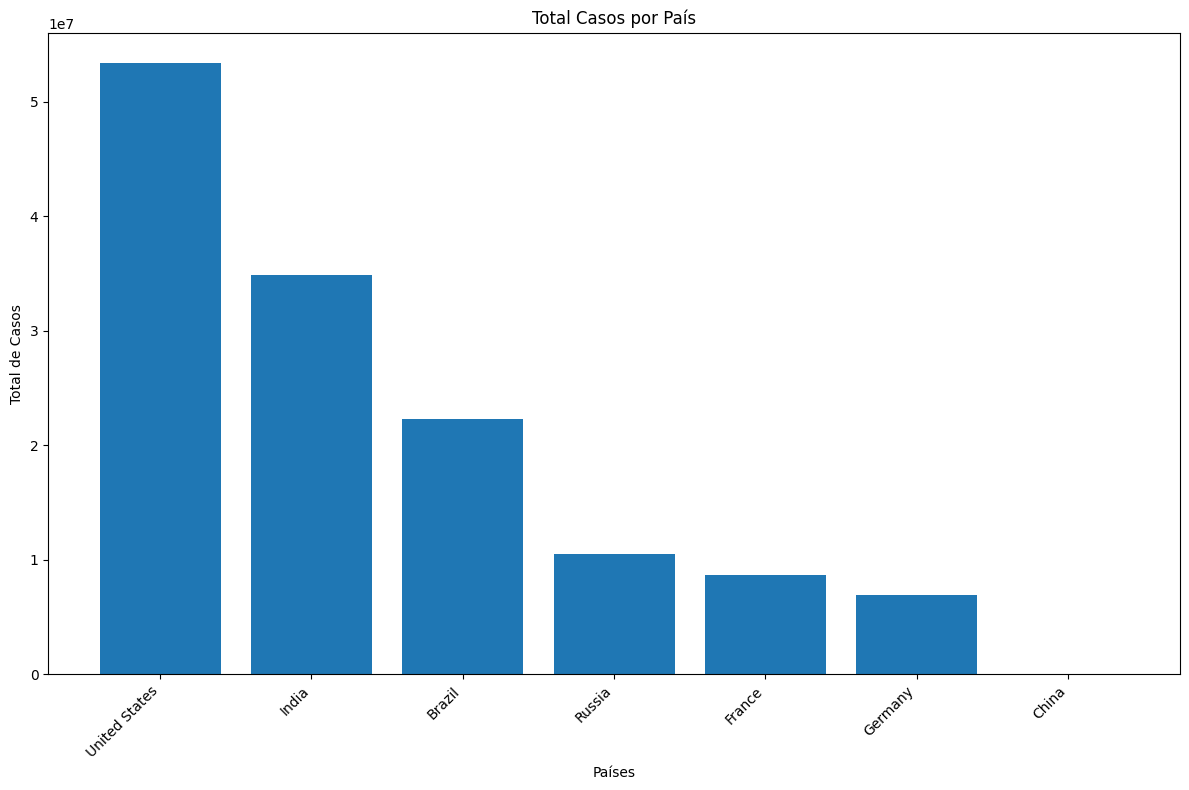

In [ ]:
#Somando e agrupando por países
country_cases = df_covid_reduced.groupby('country')['new_cases'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(country_cases.index, country_cases.values)
plt.title('Total Casos por País')
plt.xlabel('Países')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



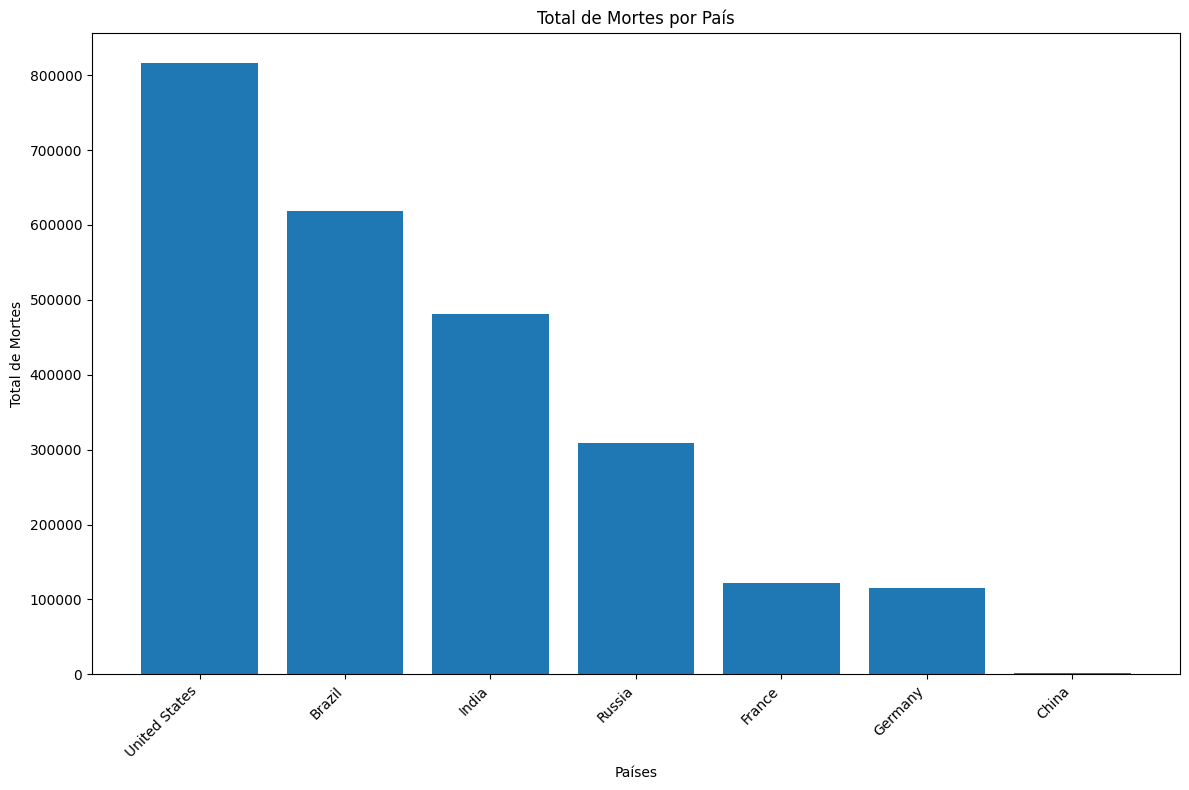

In [ ]:
# Agrupando por países e somando os casos.
country_cases = df_covid_reduced.groupby('country')['new_deaths'].sum().sort_values(ascending=False)

# Gráfico por barras mortes e países.
plt.figure(figsize=(12, 8))
plt.bar(country_cases.index, country_cases.values)
plt.title('Total de Mortes por País')
plt.xlabel('Países')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os gráficos de barras mostram que o dataset não está balanceado com relação ao número total de casos por pais nem com relação ao número de mortes por páis.

##**3.2- Estatísticas descritivas**
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df_covid_reduced.select_dtypes(exclude=['datetime64[ns]']).describe()

,new_cases,new_deaths,taxa_mortalidade,c1m_school_closing,c2m_workplace_closing,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations
count,4479.0,4480.0,3379.000000,4480.0,4480.0,4480.0,4480.0,2388.0
mean,30512.629382,549.952009,0.024886,2.162723,2.108705,1.612054,2.981696,348730112.0
std,54160.636547,825.846034,0.072969,0.873358,0.700534,0.995833,0.978046,587249216.0
min,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,3.5,0.0,0.010453,2.0,2.0,1.0,2.0,36028892.0
50%,9445.0,216.5,0.019147,2.0,2.0,2.0,3.0,107486864.0
75%,37942.0,792.0,0.030308,3.0,3.0,2.0,4.0,338407552.0
max,519740.0,6460.0,3.623595,3.0,3.0,3.0,4.0,2835332096.0


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df_covid_reduced.select_dtypes(exclude=['datetime64[ns]']).describe().loc['mean']



,mean
new_cases,30512.629382
new_deaths,549.952009
taxa_mortalidade,0.024886
c1m_school_closing,2.162723
c2m_workplace_closing,2.108705
c6m_stay_at_home_requirements,1.612054
h6m_facial_coverings,2.981696
total_vaccinations,348730112.0


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df_covid_reduced.select_dtypes(include=np.number).describe().loc['std']

,std
new_cases,54160.636547
new_deaths,825.846034
taxa_mortalidade,0.072969
c1m_school_closing,0.873358
c2m_workplace_closing,0.700534
c6m_stay_at_home_requirements,0.995833
h6m_facial_coverings,0.978046
total_vaccinations,587249216.0


In [ ]:
df_covid_reduced.describe()

,date,new_cases,new_deaths,taxa_mortalidade,c1m_school_closing,c2m_workplace_closing,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations
count,4480,4479.0,4480.0,3379.000000,4480.0,4480.0,4480.0,4480.0,2388.0
mean,2021-02-14 12:00:00,30512.629382,549.952009,0.024886,2.162723,2.108705,1.612054,2.981696,348730112.0
min,2020-04-01 00:00:00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2020-09-07 18:00:00,3.5,0.0,0.010453,2.0,2.0,1.0,2.0,36028892.0
50%,2021-02-14 12:00:00,9445.0,216.5,0.019147,2.0,2.0,2.0,3.0,107486864.0
75%,2021-07-24 06:00:00,37942.0,792.0,0.030308,3.0,3.0,2.0,4.0,338407552.0
max,2021-12-31 00:00:00,519740.0,6460.0,3.623595,3.0,3.0,3.0,4.0,2835332096.0
std,NaN,54160.636547,825.846034,0.072969,0.873358,0.700534,0.995833,0.978046,587249216.0


  Pelos dois gráficos apresentados, percebe-se que há uma variação grande do número de mortos e casos atrvés do tempo e pelos países. O que leva a realizar ajustes mais profundos.

## **3.3 Histograma**

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### 3.3.1 One-Hot-Enconding.
Para moster como as variáveis com relação ao deistânciamento se espalam pelo dataset, será aplicado nas colunas que representam as políticas de afastamento, uma vez que são dados categóricos, logo um valor não pode ser priorização sobre o outro.

In [ ]:
# Encoder para ecolas.
encoder = OneHotEncoder(sparse_output=False, dtype=int)
one_hot_encoded = encoder.fit_transform(df_covid_reduced[['c1m_school_closing']])

# Cria novas colunas.
new_columns = [f'school_closing_{int(cat)}' for cat in encoder.categories_[0]]
print(f"Feature names: {new_columns}")
print()

#novo df somente com os novos campos
one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_columns, index=df_covid_reduced.index)
# Ajustando o DF principal
df_covid_reduced = pd.concat([df_covid_reduced.drop('c1m_school_closing', axis=1), one_hot_df], axis=1)
display(df_covid_reduced)


Feature names: ['school_closing_0', 'school_closing_1', 'school_closing_2', 'school_closing_3']



,country,date,new_cases,new_deaths,taxa_mortalidade,c2m_workplace_closing,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3
61778,Brazil,2020-04-01,323,23,0.071207,3,1,2,<NA>,0,0,0,1
61779,Brazil,2020-04-02,1138,42,0.036907,3,1,2,<NA>,0,0,0,1
61780,Brazil,2020-04-03,1119,40,0.035746,3,1,2,<NA>,0,0,0,1
61781,Brazil,2020-04-04,1074,58,0.054004,3,1,2,<NA>,0,0,0,1
61782,Brazil,2020-04-05,1146,60,0.052356,3,1,2,<NA>,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462403,United States,2021-12-27,115824,262,0.002262,1,1,2,516223904.0,0,0,1,0
462404,United States,2021-12-28,211284,266,0.001259,1,1,2,517933952.0,0,0,1,0
462405,United States,2021-12-29,464495,1786,0.003845,1,1,2,519626496.0,0,0,1,0
462406,United States,2021-12-30,389514,2331,0.005984,1,1,2,521176768.0,0,0,1,0


In [ ]:
#Encoder Trabalho
encoder = OneHotEncoder(sparse_output=False, dtype=int)
one_hot_encoded = encoder.fit_transform(df_covid_reduced[['c2m_workplace_closing']])

#novo df somente com os novos campos
new_columns = [f'workplace_closing{int(cat)}' for cat in encoder.categories_[0]]
print(f"Novas Colunas: {new_columns}")
print()

one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_columns, index=df_covid_reduced.index)
# Ajustando o DF principal
df_covid_reduced = pd.concat([df_covid_reduced.drop('c2m_workplace_closing', axis=1), one_hot_df], axis=1)
display(df_covid_reduced)


Novas Colunas: ['workplace_closing0', 'workplace_closing1', 'workplace_closing2', 'workplace_closing3']



,country,date,new_cases,new_deaths,taxa_mortalidade,c6m_stay_at_home_requirements,h6m_facial_coverings,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,workplace_closing0,workplace_closing1,workplace_closing2,workplace_closing3
61778,Brazil,2020-04-01,323,23,0.071207,1,2,<NA>,0,0,0,1,0,0,0,1
61779,Brazil,2020-04-02,1138,42,0.036907,1,2,<NA>,0,0,0,1,0,0,0,1
61780,Brazil,2020-04-03,1119,40,0.035746,1,2,<NA>,0,0,0,1,0,0,0,1
61781,Brazil,2020-04-04,1074,58,0.054004,1,2,<NA>,0,0,0,1,0,0,0,1
61782,Brazil,2020-04-05,1146,60,0.052356,1,2,<NA>,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462403,United States,2021-12-27,115824,262,0.002262,1,2,516223904.0,0,0,1,0,0,1,0,0
462404,United States,2021-12-28,211284,266,0.001259,1,2,517933952.0,0,0,1,0,0,1,0,0
462405,United States,2021-12-29,464495,1786,0.003845,1,2,519626496.0,0,0,1,0,0,1,0,0
462406,United States,2021-12-30,389514,2331,0.005984,1,2,521176768.0,0,0,1,0,0,1,0,0


In [ ]:
#Encoder Fique em casa
encoder = OneHotEncoder(sparse_output=False, dtype=int)
one_hot_encoded = encoder.fit_transform(df_covid_reduced[['c6m_stay_at_home_requirements']])

#novo df somente com os novos campos
new_columns = [f'stay_at_home{int(cat)}' for cat in encoder.categories_[0]]
print(f"Novas Colunas: {new_columns}")
print()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_columns, index=df_covid_reduced.index)

# Ajustando o DF principal
df_covid_reduced = pd.concat([df_covid_reduced.drop('c6m_stay_at_home_requirements', axis=1), one_hot_df], axis=1)
display(df_covid_reduced)

Novas Colunas: ['stay_at_home0', 'stay_at_home1', 'stay_at_home2', 'stay_at_home3']



,country,date,new_cases,new_deaths,taxa_mortalidade,h6m_facial_coverings,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,workplace_closing0,workplace_closing1,workplace_closing2,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3
61778,Brazil,2020-04-01,323,23,0.071207,2,<NA>,0,0,0,1,0,0,0,1,0,1,0,0
61779,Brazil,2020-04-02,1138,42,0.036907,2,<NA>,0,0,0,1,0,0,0,1,0,1,0,0
61780,Brazil,2020-04-03,1119,40,0.035746,2,<NA>,0,0,0,1,0,0,0,1,0,1,0,0
61781,Brazil,2020-04-04,1074,58,0.054004,2,<NA>,0,0,0,1,0,0,0,1,0,1,0,0
61782,Brazil,2020-04-05,1146,60,0.052356,2,<NA>,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462403,United States,2021-12-27,115824,262,0.002262,2,516223904.0,0,0,1,0,0,1,0,0,0,1,0,0
462404,United States,2021-12-28,211284,266,0.001259,2,517933952.0,0,0,1,0,0,1,0,0,0,1,0,0
462405,United States,2021-12-29,464495,1786,0.003845,2,519626496.0,0,0,1,0,0,1,0,0,0,1,0,0
462406,United States,2021-12-30,389514,2331,0.005984,2,521176768.0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
#Encoder Mascara
encoder = OneHotEncoder(sparse_output=False, dtype=int)
one_hot_encoded = encoder.fit_transform(df_covid_reduced[['h6m_facial_coverings']])

#novo df somente com os novos campos
new_columns = [f'facial_covering{int(cat)}' for cat in encoder.categories_[0]]
print(f"Novas Colunas: {new_columns}")
print()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_columns, index=df_covid_reduced.index)

# Ajustando o DF principal
df_covid_reduced = pd.concat([df_covid_reduced.drop('h6m_facial_coverings', axis=1), one_hot_df], axis=1)
display(df_covid_reduced)

Novas Colunas: ['facial_covering0', 'facial_covering1', 'facial_covering2', 'facial_covering3', 'facial_covering4']



,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61778,Brazil,2020-04-01,323,23,0.071207,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61779,Brazil,2020-04-02,1138,42,0.036907,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61780,Brazil,2020-04-03,1119,40,0.035746,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61781,Brazil,2020-04-04,1074,58,0.054004,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61782,Brazil,2020-04-05,1146,60,0.052356,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462403,United States,2021-12-27,115824,262,0.002262,516223904.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
462404,United States,2021-12-28,211284,266,0.001259,517933952.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
462405,United States,2021-12-29,464495,1786,0.003845,519626496.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
462406,United States,2021-12-30,389514,2331,0.005984,521176768.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_covid_reduced.head()

,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61778,Brazil,2020-04-01,323,23,0.071207,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61779,Brazil,2020-04-02,1138,42,0.036907,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61780,Brazil,2020-04-03,1119,40,0.035746,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61781,Brazil,2020-04-04,1074,58,0.054004,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61782,Brazil,2020-04-05,1146,60,0.052356,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0


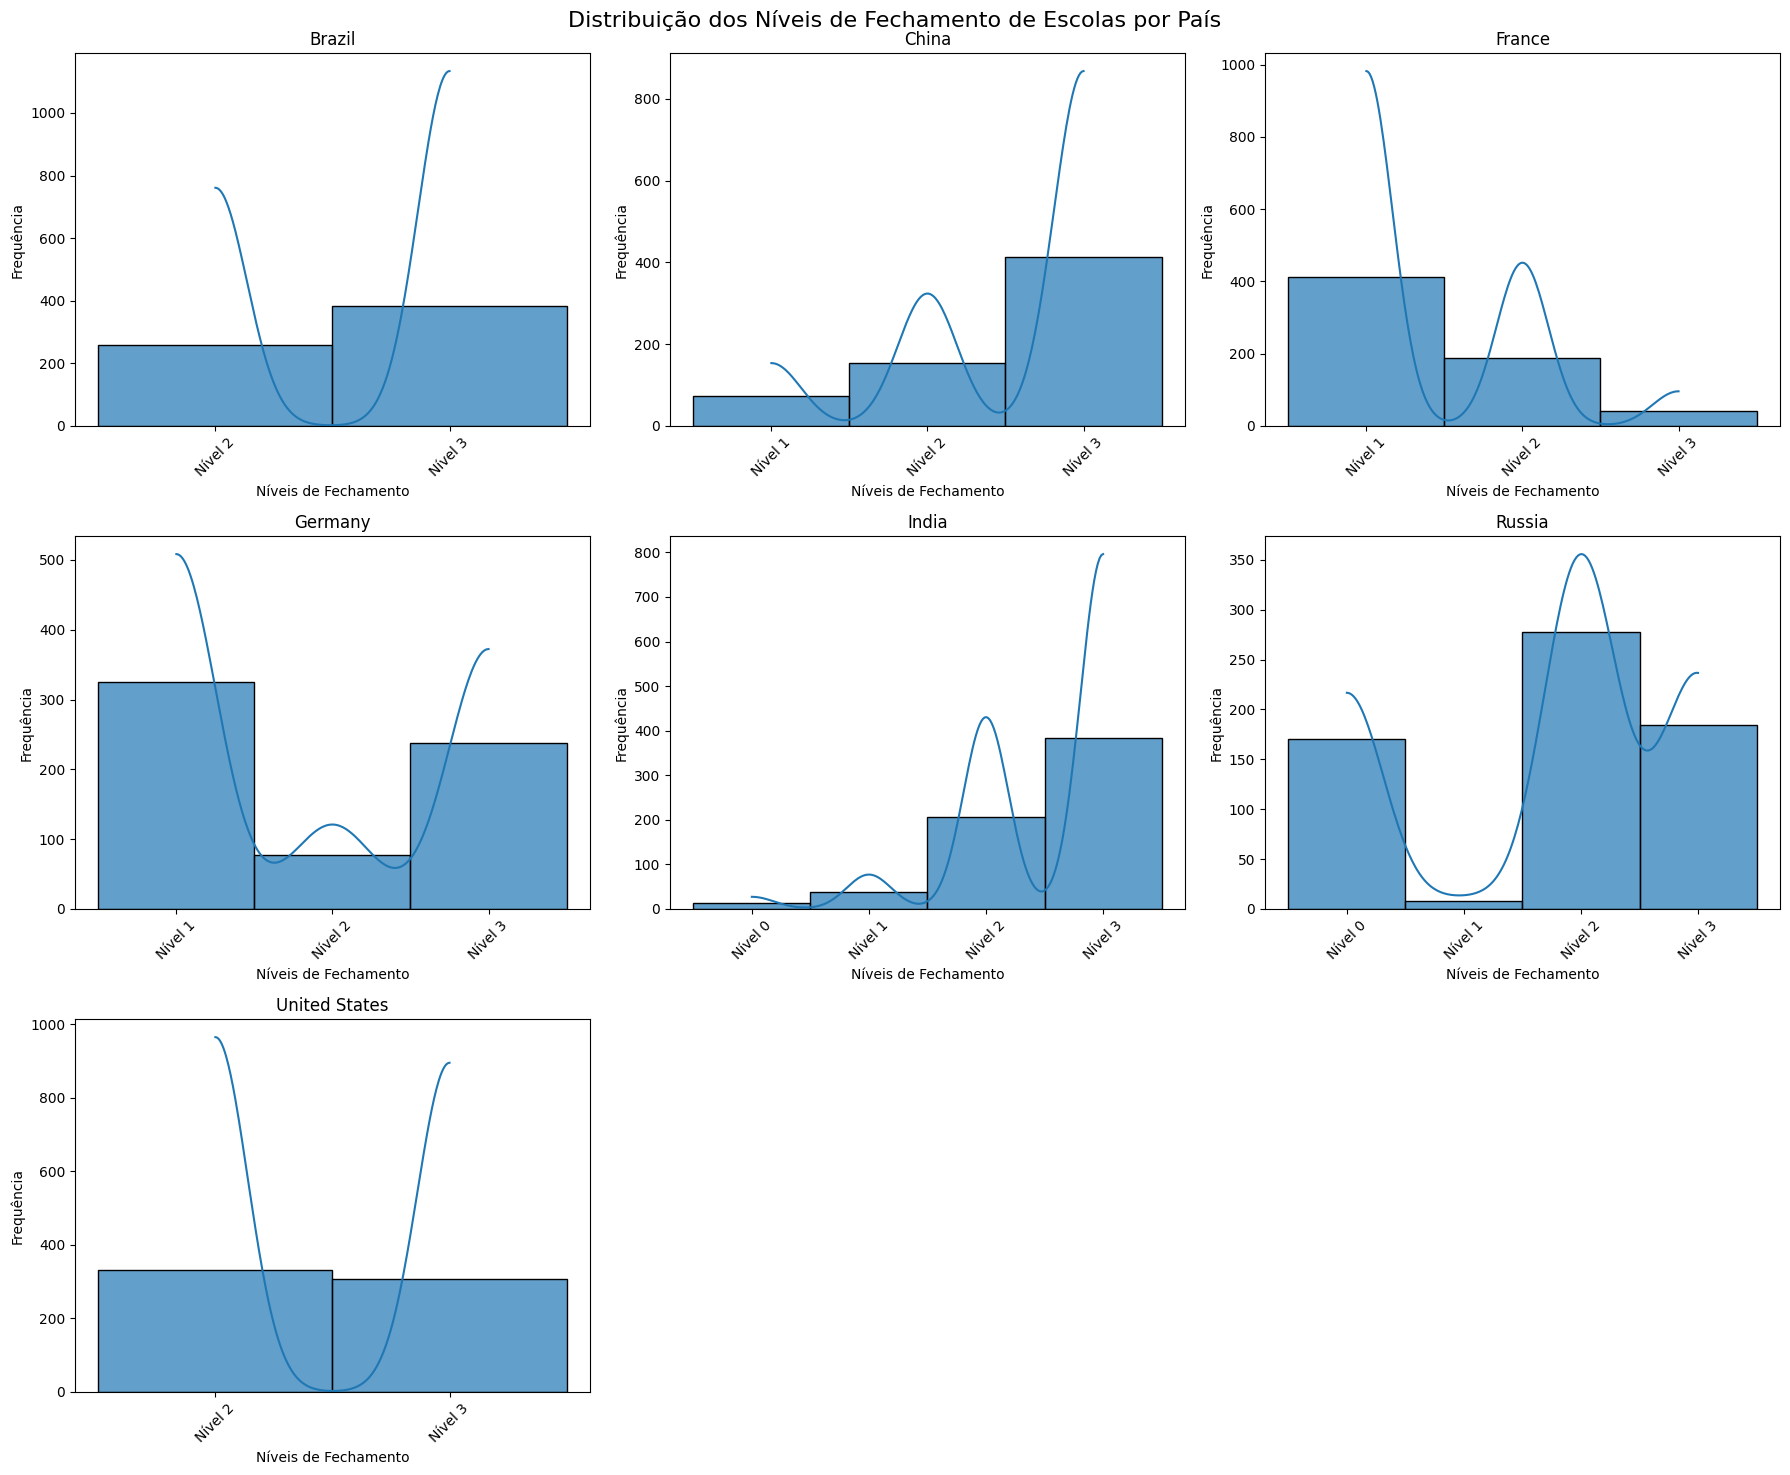

In [ ]:
# Criação de Graficos por pais - Escolas.
plt.figure(figsize=(18, 15))

# Configiração da vizualização
countries = df_covid_reduced['country'].unique()
n_countries = len(countries)
cols = 3
rows = (n_countries + cols - 1) // cols

for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)

    # fitragem por paid
    country_data = df_covid_reduced[df_covid_reduced['country'] == country]

    #Criando histagrama
    levels = []
    frequencies = []
    for level in range(4):
        col_name = f'school_closing_{level}'
        levels.extend([f'Nível {level}'] * int(country_data[col_name].sum()))

    if levels:  #Só imprime se houver dado
        sns.histplot(levels, bins=4, alpha=0.7, edgecolor='black',kde=True)

    plt.title(f'{country}')
    plt.xlabel('Níveis de Fechamento')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.suptitle('Distribuição dos Níveis de Fechamento de Escolas por País', fontsize=16)
plt.tight_layout()
plt.show()


Os gráficos acima mostram como ficou a distribuição das medidas de afastamento entres os países, com relação ao fechamento das escolas. Através deles podemos perceber que cada país adotou uma medida diferente.

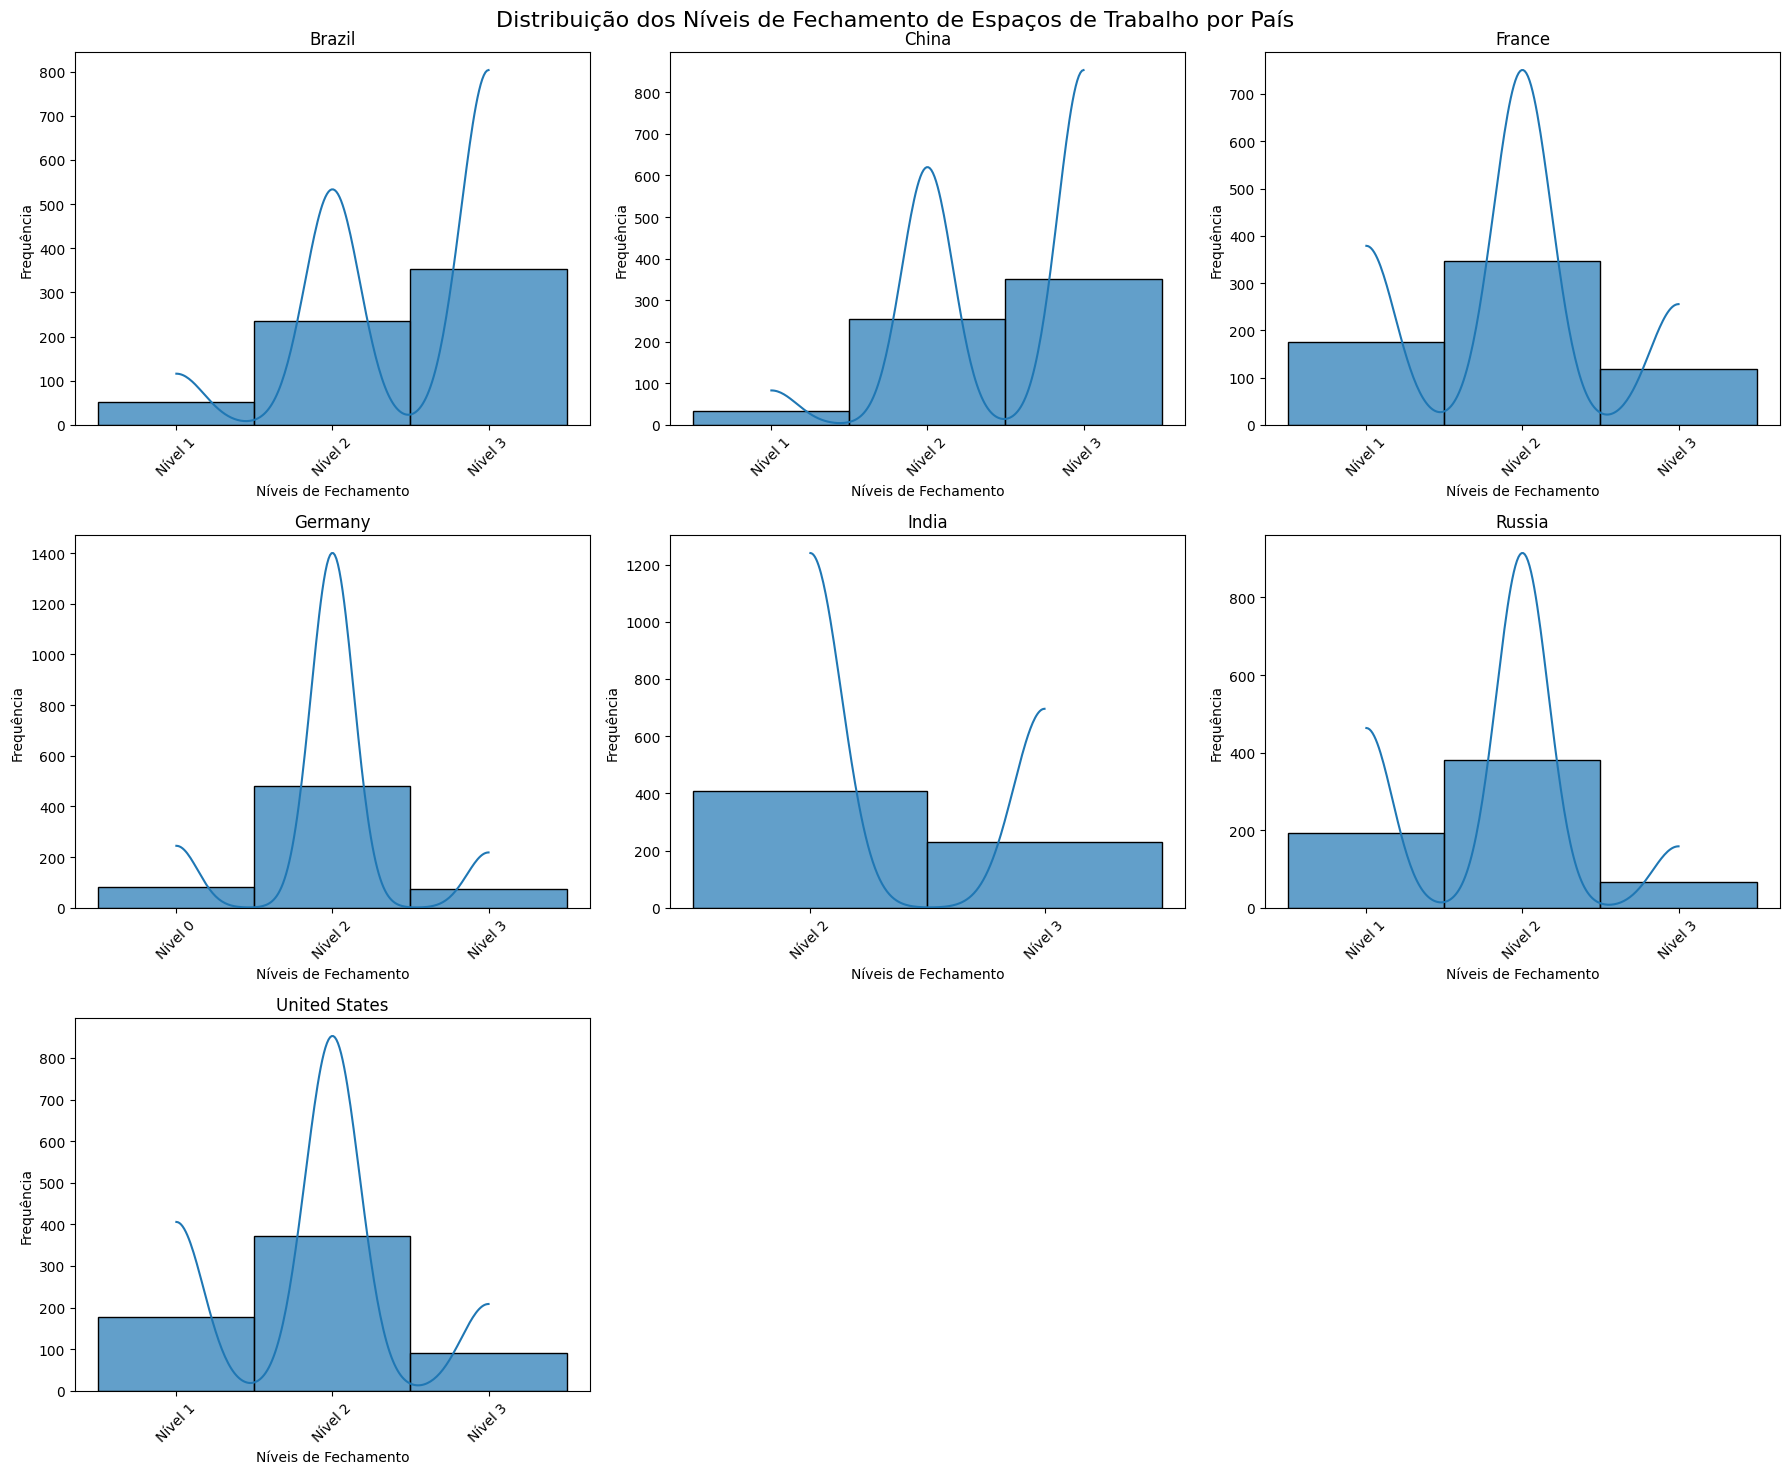

In [ ]:
# Criação de Graficos por pais - Trabalho.
plt.figure(figsize=(18, 15))

# Configiração da vizualização
countries = df_covid_reduced['country'].unique()
n_countries = len(countries)
cols = 3
rows = (n_countries + cols - 1) // cols

for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)

    # fitragem por paid
    country_data = df_covid_reduced[df_covid_reduced['country'] == country]

    #Criando histagrama
    levels = []
    frequencies = []
    for level in range(4):
        col_name = f'workplace_closing{level}'
        levels.extend([f'Nível {level}'] * int(country_data[col_name].sum()))

    if levels:  #Só imprime se houver dado
        sns.histplot(levels, bins=4, alpha=0.7, edgecolor='black',kde=True)

    plt.title(f'{country}')
    plt.xlabel('Níveis de Fechamento')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.suptitle('Distribuição dos Níveis de Fechamento de Espaços de Trabalho por País', fontsize=16)
plt.tight_layout()
plt.show()


Os gráficos acima mostram como ficou a distribuição das medidas de afastamento entres os países, com relação ao fechamento dos espaços de trabalho. Através deles podemos perceber que cada país adotou uma medida diferente.

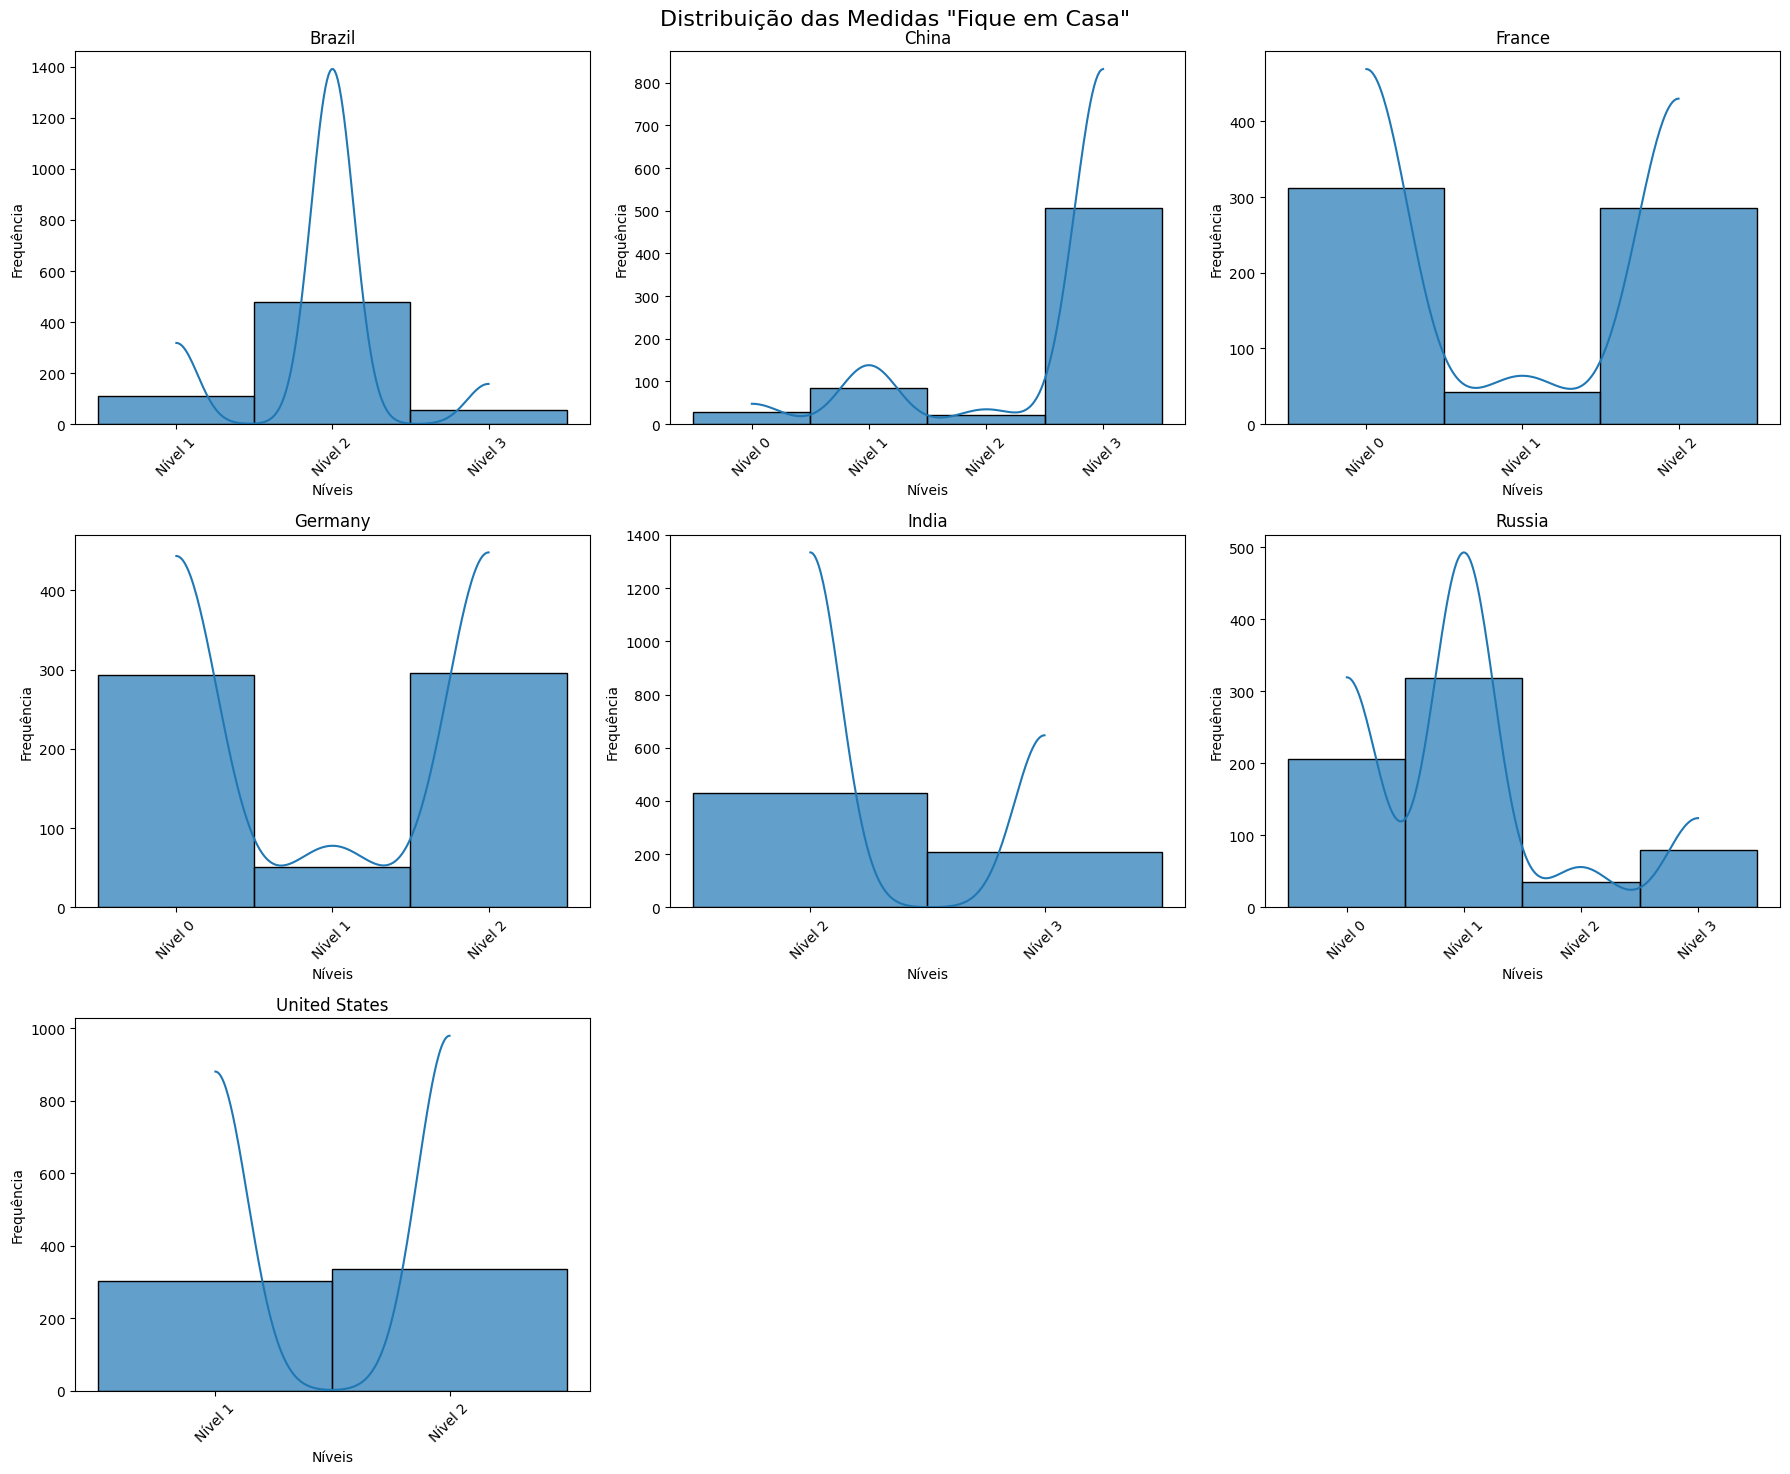

In [ ]:
# Criação de Graficos por pais - Fique em Casa.
plt.figure(figsize=(18, 15))

# Configiração da vizualização
countries = df_covid_reduced['country'].unique()
n_countries = len(countries)
cols = 3
rows = (n_countries + cols - 1) // cols

for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)

    # fitragem por paid
    country_data = df_covid_reduced[df_covid_reduced['country'] == country]

    #Criando histagrama
    levels = []
    frequencies = []
    for level in range(4):
        col_name = f'stay_at_home{level}'
        levels.extend([f'Nível {level}'] * int(country_data[col_name].sum()))

    if levels:  #Só imprime se houver dado
        sns.histplot(levels, bins=4, alpha=0.7, edgecolor='black',kde=True)

    plt.title(f'{country}')
    plt.xlabel('Níveis')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.suptitle('Distribuição das Medidas "Fique em Casa"', fontsize=16)
plt.tight_layout()
plt.show()


Os gráficos acima mostram como ficou a distribuição das medidas conhecidas como "Fique em Casa" entres os países. Através deles podemos perceber que a adoção foi diferente em cada país.

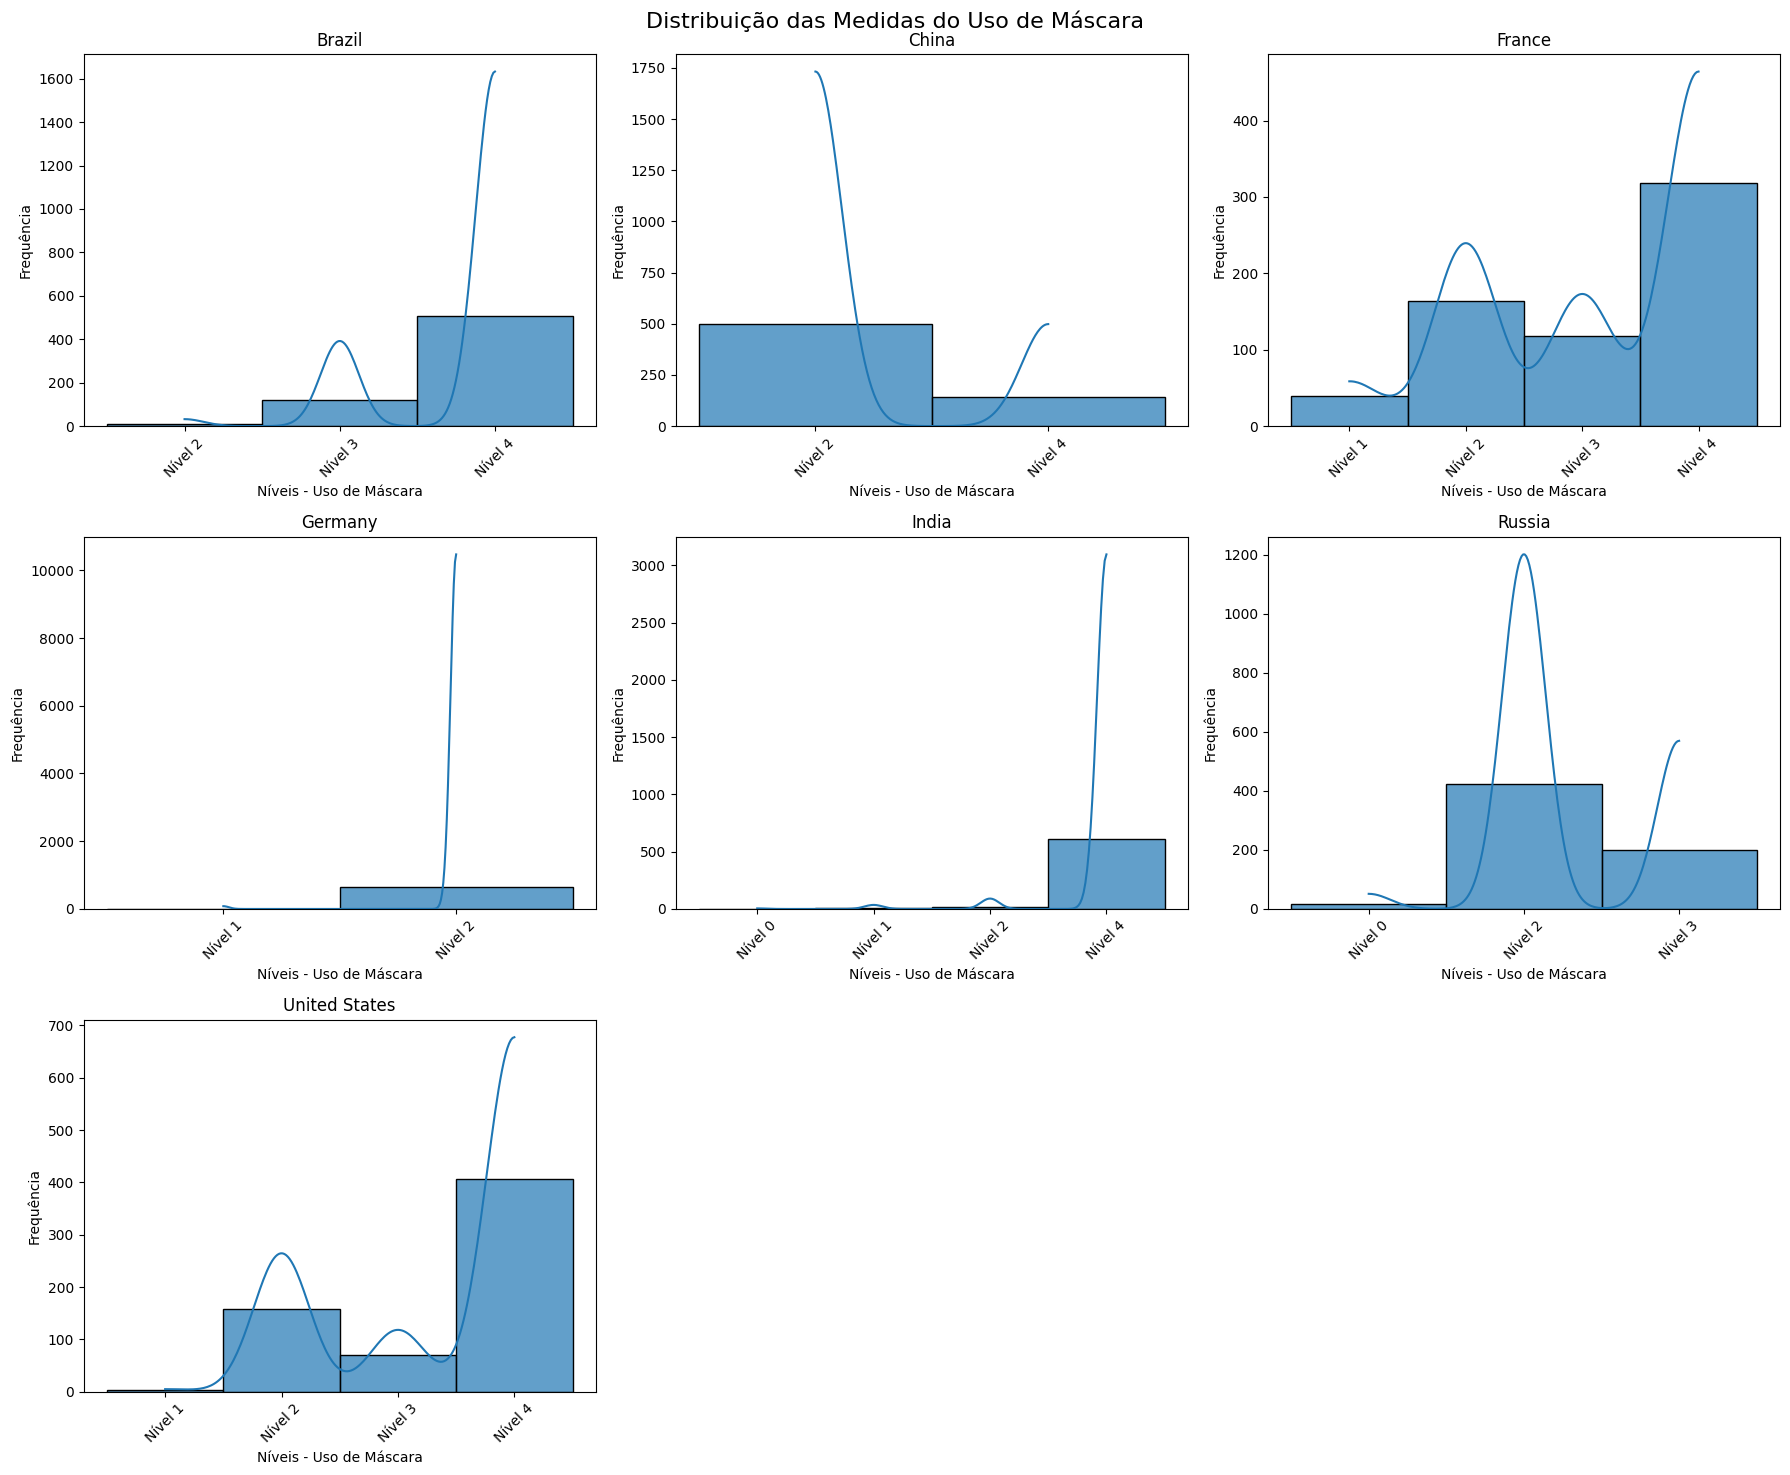

In [ ]:
# Criação de Graficos por pais - Uso de máscara
plt.figure(figsize=(18, 15))

# Configiração da vizualização
countries = df_covid_reduced['country'].unique()
n_countries = len(countries)
cols = 3
rows = (n_countries + cols - 1) // cols

for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)

    # fitragem por paid
    country_data = df_covid_reduced[df_covid_reduced['country'] == country]

    #Criando histagrama
    levels = []
    frequencies = []
    for level in range(5):
        col_name = f'facial_covering{level}'
        levels.extend([f'Nível {level}'] * int(country_data[col_name].sum()))

    if levels:  #Só imprime se houver dado
        sns.histplot(levels, bins=4, alpha=0.7, edgecolor='black',kde=True)

    plt.title(f'{country}')
    plt.xlabel('Níveis - Uso de Máscara')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.suptitle('Distribuição das Medidas do Uso de Máscara', fontsize=16)
plt.tight_layout()
plt.show()

Os gráficos acima mostram como ficou a distribuição do uso de máscara entres os países, Através deles podemos perceber que a adoção do uso de máscara foi diferente em cada país.

# **4 - Boxplot**

Para entender se houve diferenças entre taxa de mortalidade entre os países, olhamos os valores  agrupados. Isso nos permite comparar a média, mediana e desvio padrão da taxa de mortalidade para cada um deles.
De acordo com o gráfico abaixo, podemos peerceber que a taxa de mortalidade se manteve padronizada, com alguns países com picos (outliers), como por exemplo China - com maior dispersão -  Índia e França.
No caso de Alemanha, Rússia, Estados Unidos e Brasil, a variação nas taxas de mortalidade é menor.

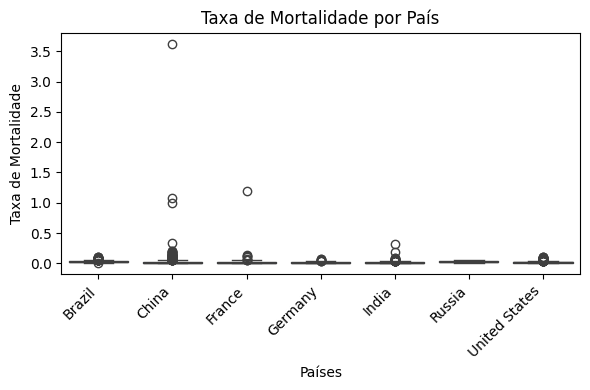

In [ ]:

# Gráfico de boxplot para taxa de mortalidade por país
df_temp = df_covid_reduced.copy()
df_temp['taxa_mortalidade'] = df_temp['taxa_mortalidade']
plt.figure(figsize=(6, 4))
sns.boxplot(x='country', y='taxa_mortalidade', data=df_temp)
plt.title('Taxa de Mortalidade por País')
plt.xlabel('Países')
plt.ylabel('Taxa de Mortalidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **5 Matriz de Correlação**

Para entender se houve diferenças entre taxa de mortalidade entre os países, olhamos os valores  agrupados. Isso nos permite comparar a média, mediana e desvio padrão da taxa de mortalidade para cada um deles.
De acordo com o gráfico abaixo, podemos peerceber que a taxa de mortalidade se manteve padronizada, con alguns países com picos (outliers).

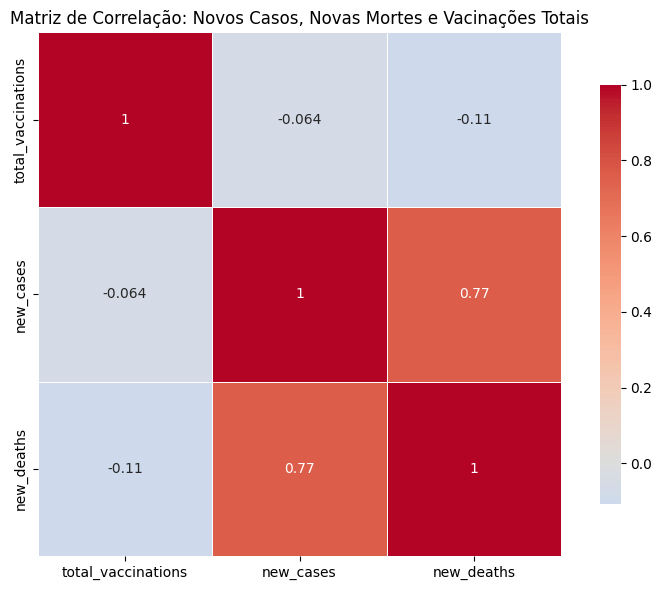

In [351]:
# Selecionando apenas campos para a Mia
correlation_data = df_covid_reduced[['total_vaccinations', 'new_cases', 'new_deaths',]]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            linewidths=0.5,       # Add lines between cells
            cbar_kws={"shrink": .8})  # Adjust colorbar size

plt.title('Matriz de Correlação: Novos Casos, Novas Mortes e Vacinações Totais')
plt.tight_layout()
plt.show()


O mapa de calor mostra obviamente uma relação positiva forte, entre o número de mortes e o número de casos, mas mostra também uma relação negativa forte entre as vacinações e o número de casos e o número de mortes.

# **6 Gráfico de Linhas.**
Como as variáveis do dataset variam de acordo com a passagem de tempo, ou seja, mostram uma evolução histórica. Algúns gráficos de linhas podem ajudar melhor no entendimento dos dados.

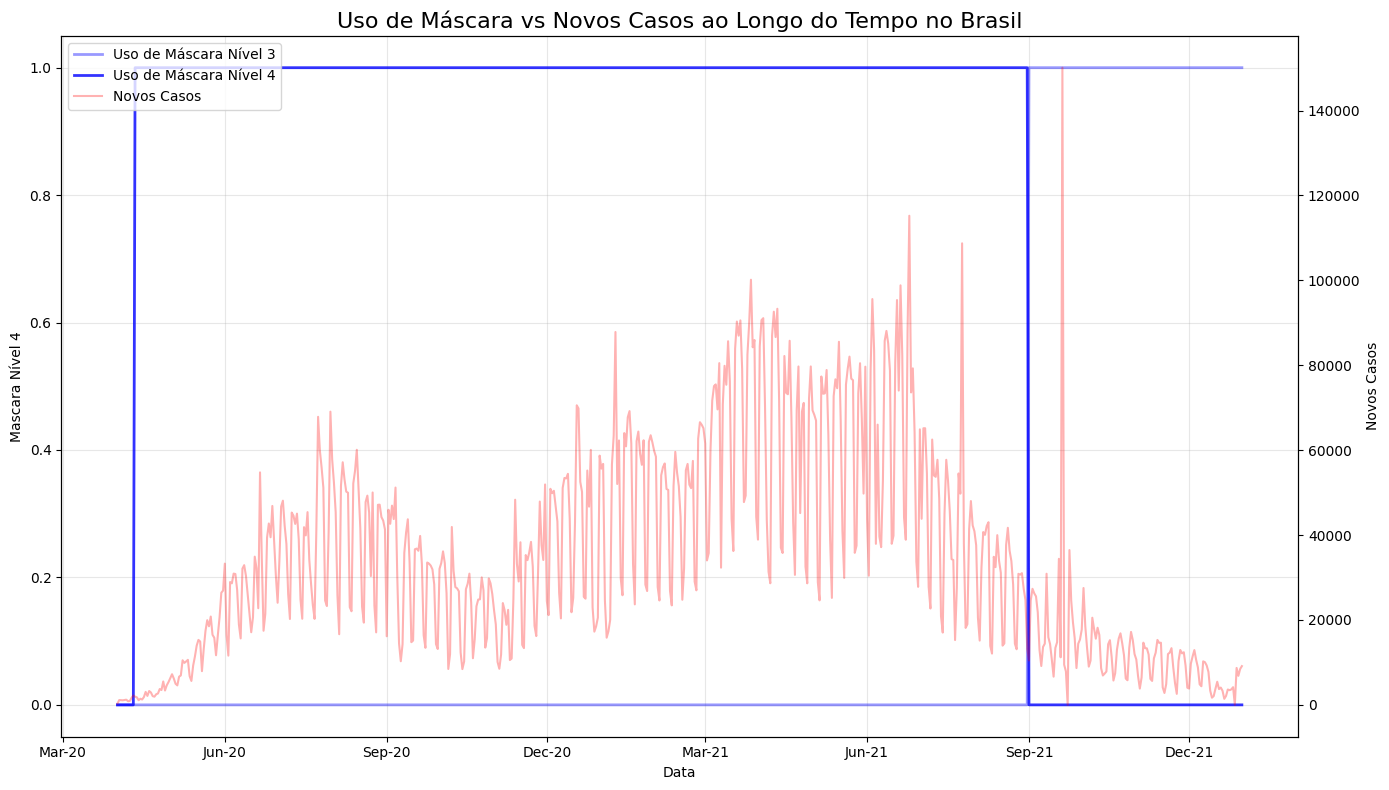

In [ ]:
#Somando os valores

brazil_data = df_covid_reduced[df_covid_reduced['country'] == 'Brazil']
daily_data = brazil_data.groupby('date').agg({
    'facial_covering3': 'sum',
    'facial_covering4': 'sum',
    'new_cases': 'sum'
}).reset_index()

#mascara nível 3
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Mascara Nível 3')
ax1.plot(daily_data['date'], daily_data['facial_covering3'],
         color= 'blue', linewidth=2, alpha=0.4, label='Uso de Máscara Nível 3')
ax1.tick_params(axis='y')



### mascara nível 4
ax1.set_xlabel('Data')
ax1.set_ylabel('Mascara Nível 4')
ax1.plot(daily_data['date'], daily_data['facial_covering4'],
         color= 'blue', linewidth=2, alpha=0.8, label='Uso de Máscara Nível 4')
ax1.tick_params(axis='y')

#Create second y-axis for new_cases and new_deaths
ax2 = ax1.twinx()

ax2.plot(daily_data['date'], daily_data['new_cases'],
         color= 'red', linewidth=1.5, alpha=0.3, label='Novos Casos')

ax2.set_ylabel('Novos Casos', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Uso de Máscara vs Novos Casos ao Longo do Tempo no Brasil', fontsize=16)

#Format x-axis with MONTHLY intervals
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

ax1.grid(True, alpha=0.3)

#Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

O gráfico mostra que, ao longo do tempo, não houve nenhuma relação entre a quantidade de novos casos e o uso de máscara no Brasil.
De acordo com os gráficos de histograma, os valores com mais frequência sobre o uso de máscara foram nos níveis 3 e 4, confirgurados no gódigo acima.

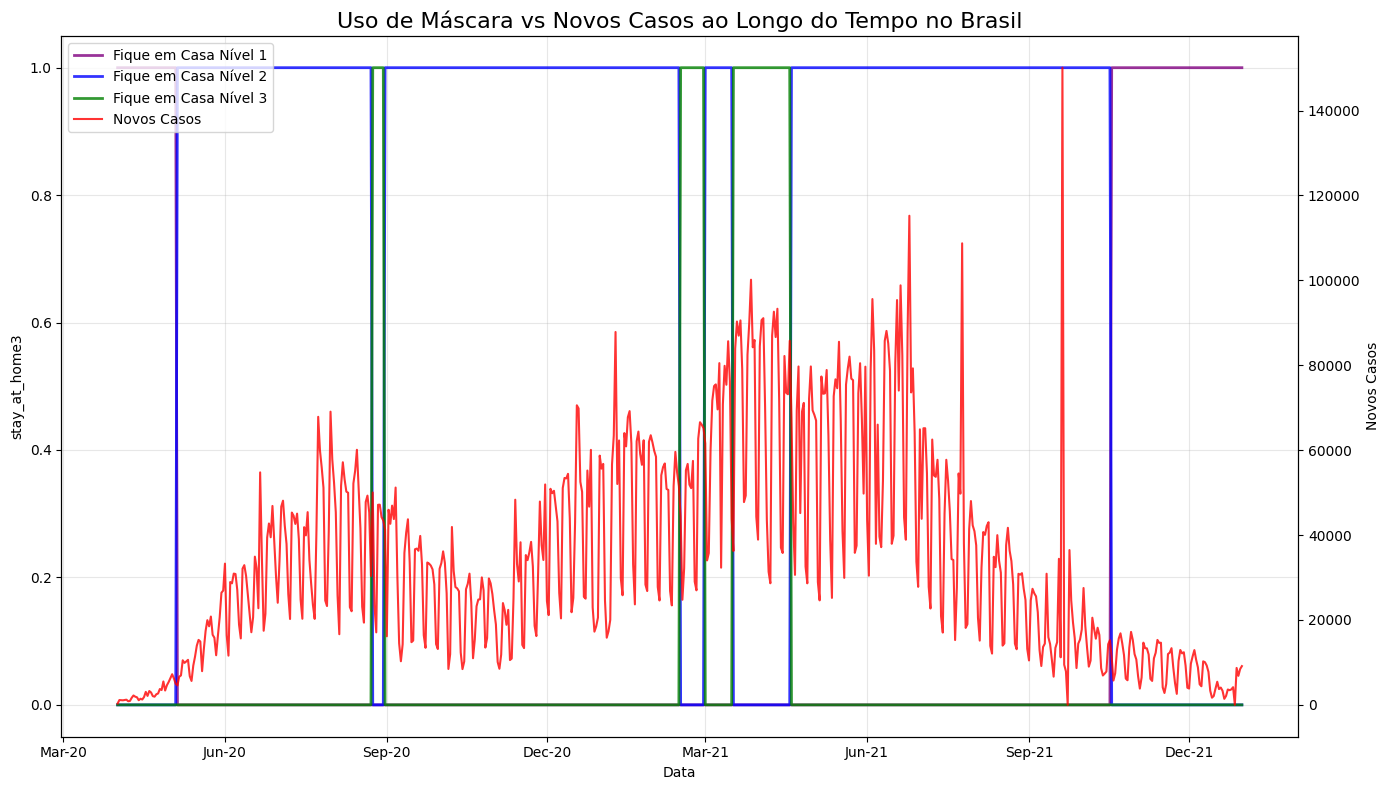

In [ ]:
 #Somando os valores

brazil_data = df_covid_reduced[df_covid_reduced['country'] == 'Brazil']
daily_data = brazil_data.groupby('date').agg({
    'stay_at_home1': 'sum',
    'stay_at_home2': 'sum',
    'stay_at_home3': 'sum',
    'new_cases': 'sum'
}).reset_index()

#em casa nivel 1
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Data')
ax1.set_ylabel('stay_at_home1')
ax1.plot(daily_data['date'], daily_data['stay_at_home1'],
         color= 'purple', linewidth=2, alpha=0.8, label='Fique em Casa Nível 1')
ax1.tick_params(axis='y')

#em casa nivel 2
ax1.set_xlabel('Data')
ax1.set_ylabel('stay_at_home2')
ax1.plot(daily_data['date'], daily_data['stay_at_home2'],
         color= 'blue', linewidth=2, alpha=0.8, label='Fique em Casa Nível 2')
ax1.tick_params(axis='y')


### em casa nivel 3
ax1.set_xlabel('Data')
ax1.set_ylabel('stay_at_home3')
ax1.plot(daily_data['date'], daily_data['stay_at_home3'],
         color= 'green', linewidth=2, alpha=0.8, label='Fique em Casa Nível 3')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()

ax2.plot(daily_data['date'], daily_data['new_cases'],
         color= 'red', linewidth=1.5, alpha=0.8, label='Novos Casos')

ax2.set_ylabel('Novos Casos', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Uso de Máscara vs Novos Casos ao Longo do Tempo no Brasil', fontsize=16)

#Format x-axis with MONTHLY intervals
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

ax1.grid(True, alpha=0.3)

#Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

Assim como no gráfico anterior, este gráfico mostra que, ao longo do tempo, não houve nenhuma relação entre a quantidade de novos casos e a adoção das políticas de "Fique em Casa" no Brasil.
De acordo com os gráficos de histograma, os valores com mais frequência sobre a adoção desta medida no país foram o níveis 1(roxo), 2(azul) e 3(verde), confirgurados no código acima.

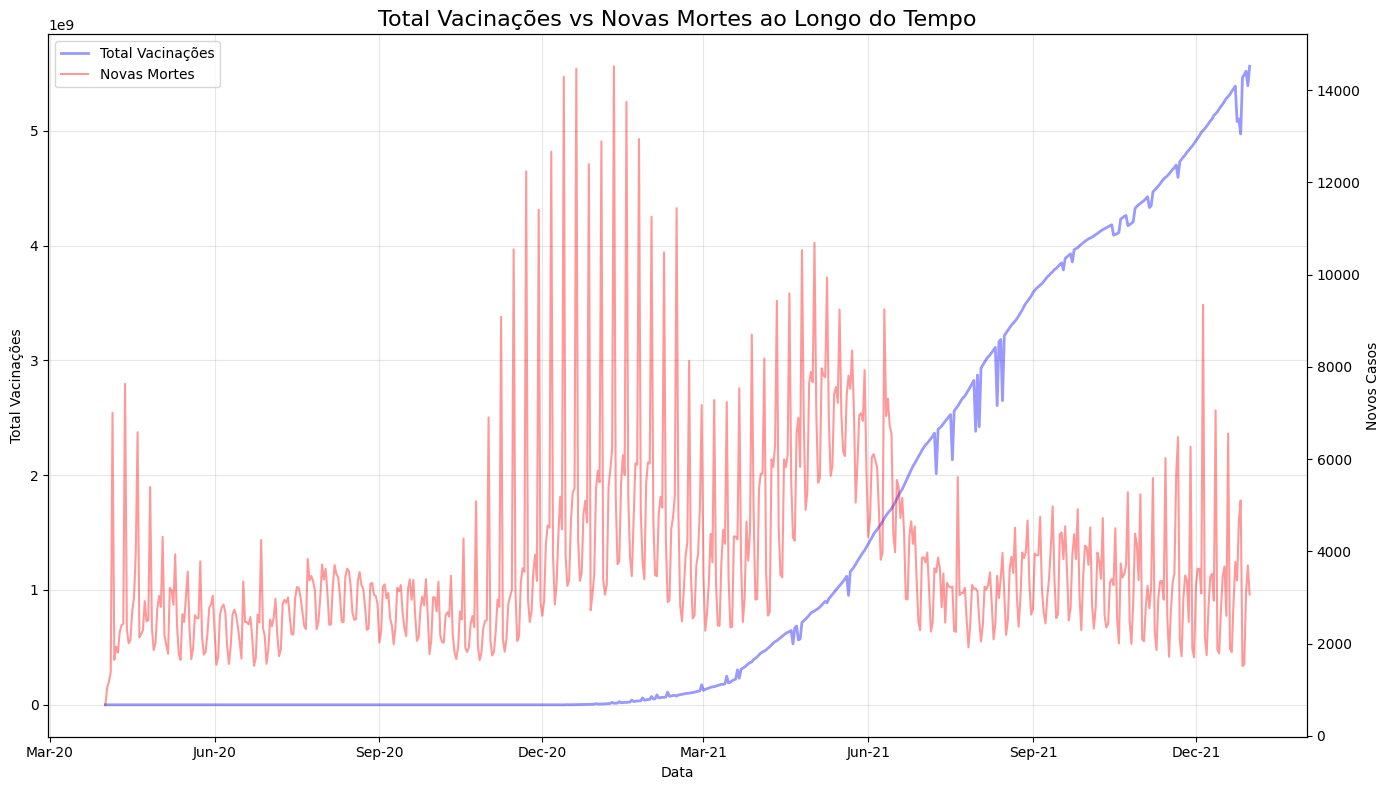

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Somando os valores
daily_data = df_covid_reduced.groupby('date').agg({
    'total_vaccinations': 'sum',
    'new_deaths': 'sum'
}).reset_index()

#  Criando o g;afico
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Total Vacinações')
ax1.plot(daily_data['date'], daily_data['total_vaccinations'],
         color= 'blue', linewidth=2, alpha=0.4, label='Total Vacinações')
ax1.tick_params(axis='y')

# Create second y-axis for new_cases and new_deaths
ax2 = ax1.twinx()


ax2.plot(daily_data['date'], daily_data['new_deaths'],
         color= 'red', linewidth=1.5, alpha=0.4, label='Novas Mortes')

ax2.set_ylabel('Novos Casos', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Total Vacinações vs Novas Mortes ao Longo do Tempo', fontsize=16)

# Format x-axis with MONTHLY intervals
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

ax1.grid(True, alpha=0.3)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


Por outro lado, reforçando a relação negativa forte mostrada no mapa de calor, o gráfico mostra que, ao longo do tempo, o número de morte por COVID-19, foi caindo à medida que a vacinações foram aumentando.


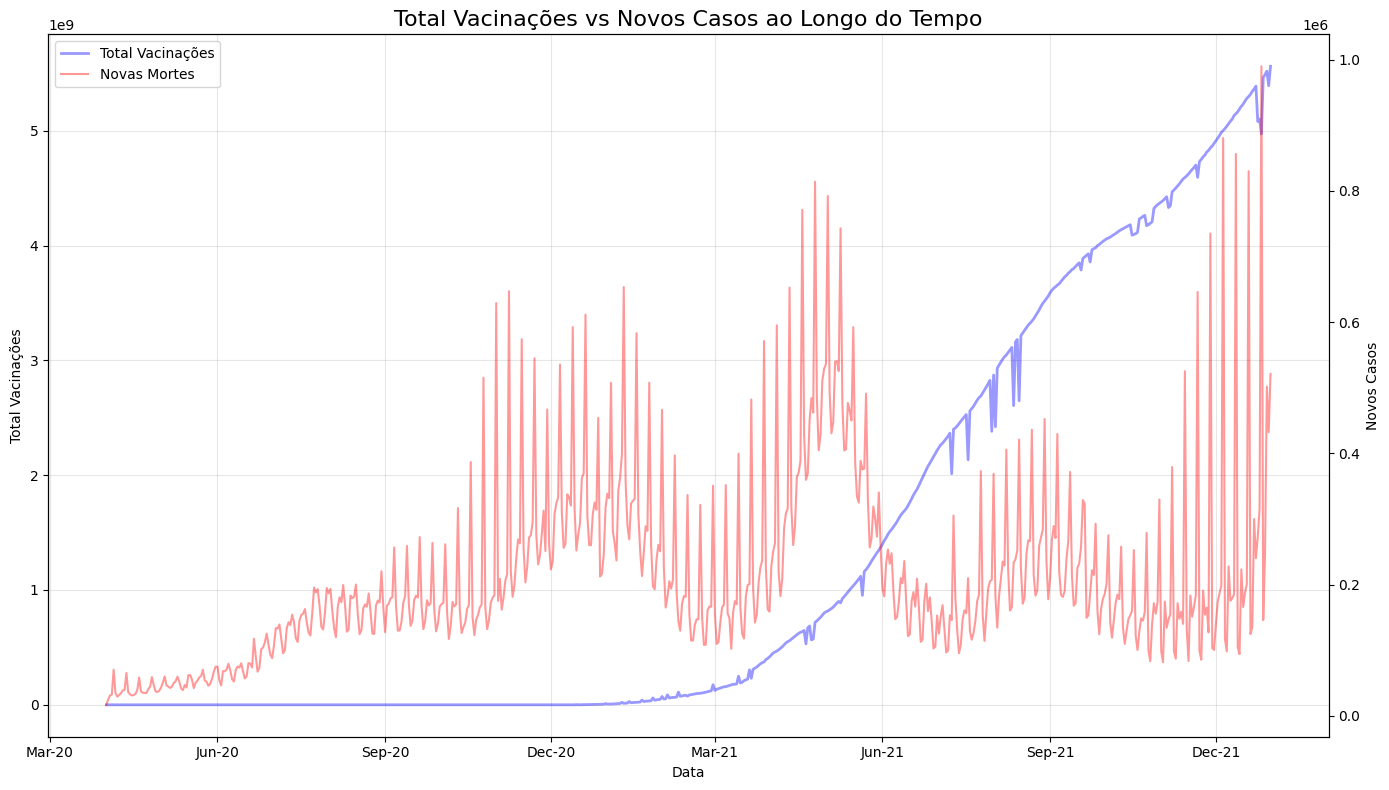

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Somando os valores
daily_data = df_covid_reduced.groupby('date').agg({
    'total_vaccinations': 'sum',
    'new_cases': 'sum'
}).reset_index()

#  Criando o grafico
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Total Vacinações')
ax1.plot(daily_data['date'], daily_data['total_vaccinations'],
         color= 'blue', linewidth=2, alpha=0.4, label='Total Vacinações')
ax1.tick_params(axis='y')

# Create second y-axis for new_cases and new_deaths
ax2 = ax1.twinx()


ax2.plot(daily_data['date'], daily_data['new_cases'],
         color= 'red', linewidth=1.5, alpha=0.4, label='Novas Mortes')

ax2.set_ylabel('Novos Casos', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Total Vacinações vs Novos Casos ao Longo do Tempo', fontsize=16)

# Format x-axis with MONTHLY intervals
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

ax1.grid(True, alpha=0.3)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


O gráfico comparativo entre novos casos e vacinações, mostra o mesmo padrão exibido quanto ao número de mortes, porém, próximo do final de 2021. O número de casos volta a crescer, o que pode levar a novas investigações de dados com algumas nosvas hipóteses, por exemplo:
* Houve, mutação do vírus?
* A eficácia das vacinas tem duração curta?

# **7 Tratamento de Valores Nulos**
Validando qualidade dos dados, buscando e tratando valores nulos.

In [ ]:
#Analisando quais colunas tem nulos.
columns_with_nulls = df_covid_reduced.isnull().sum()
columns_with_nulls = columns_with_nulls[columns_with_nulls > 0]
print(columns_with_nulls)

new_cases                1
taxa_mortalidade      1101
total_vaccinations    2092
Name: **TEMPORARY UNNAMED VARIABLE**, dtype: int64


**7.1 - Tratando nulos para a coluna de novos casos.**
Abaixo percebemos que a única linha onde não há registro de novos casos, foi em 23 de setembro de 2021.
Para essa trativa usei a mediana dos novos casos do mês de setembro de 2021 até o dia anterior ao valor nulo.

In [ ]:
nulo = df_covid_reduced[df_covid_reduced['new_cases'].isnull()]
display(nulo)

,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
62318,Brazil,2021-09-23,<NA>,485,0.0,229100352.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Trocando o valor pela mediana
filtro = df_covid_reduced[(df_covid_reduced['country'] == 'Brazil')&(df_covid_reduced['date'].between('2021-09-01', '2021-09-22'))].loc [:,['new_cases']]
mediana = filtro.median()
df_covid_reduced = df_covid_reduced.fillna(mediana)
print(mediana)


new_cases    14372.0
dtype: Float64


In [ ]:
#Validando a troca
filtro = df_covid_reduced[(df_covid_reduced['country'] == 'Brazil')&(df_covid_reduced['date']=='2021-09-23')]
display(filtro)

,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
62318,Brazil,2021-09-23,14372,485,0.0,229100352.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


**7.2 - Tratando nulos para a coluna de vacinas diaria.**
Para essa trativa troquei os valores nulos por zero.

In [ ]:
# procurando por campos nulo em vacinas
nulo = df_covid_reduced[(df_covid_reduced['total_vaccinations'].isnull())]
display (nulo)
#Buscando maior data
datas = nulo.sort_values('date')
display(datas)
#tocando por zero
df_covid_reduced = df_covid_reduced.fillna(0)


,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61778,Brazil,2020-04-01,323,23,0.071207,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61779,Brazil,2020-04-02,1138,42,0.036907,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61780,Brazil,2020-04-03,1119,40,0.035746,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61781,Brazil,2020-04-04,1074,58,0.054004,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
61782,Brazil,2020-04-05,1146,60,0.052356,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462019,United States,2020-12-08,176909,1588,0.008976,<NA>,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
462020,United States,2020-12-09,183091,1973,0.010776,<NA>,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
462021,United States,2020-12-10,226982,2561,0.011283,<NA>,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
462022,United States,2020-12-11,221251,3323,0.015019,<NA>,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


,country,date,new_cases,new_deaths,taxa_mortalidade,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,...,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61778,Brazil,2020-04-01,323,23,0.071207,<NA>,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
151328,France,2020-04-01,0,0,NaN,<NA>,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
362268,Russia,2020-04-01,440,7,0.015909,<NA>,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
163268,Germany,2020-04-01,0,0,NaN,<NA>,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
199088,India,2020-04-01,386,6,0.015544,<NA>,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62410,Brazil,2021-12-24,3451,143,0.041437,<NA>,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
62411,Brazil,2021-12-25,3645,137,0.037586,<NA>,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
62412,Brazil,2021-12-26,4164,164,0.039385,<NA>,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
362902,Russia,2021-12-26,23721,968,0.040808,<NA>,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


**7.3 Revalidando nulos**

In [ ]:
#reavaliando quais colunas tem nulos.
columns_with_nulls = df_covid_reduced.isnull().sum()
columns_with_nulls = columns_with_nulls[columns_with_nulls > 0]
print(columns_with_nulls)

Variable([], Name: **TEMPORARY UNNAMED VARIABLE**, dtype: int64)


##**8 - Pré-Processamento de dados**
O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separating Features (x) and Targets (y e Z)
x = df_covid_reduced.drop(['new_cases', 'new_deaths','taxa_mortalidade'], axis=1)
y = df_covid_reduced[['new_cases']]
z = df_covid_reduced[['new_deaths']]

In [ ]:
x_train = x[x['date'].dt.day >= 10]
x_test = x[x['date'].dt.day < 10]
y_train = y[x['date'].dt.day >= 10]
y_test = y[x['date'].dt.day < 10]
z_train = z[x['date'].dt.day >= 10]
z_test = z[x['date'].dt.day < 10]

In [ ]:
print(f"Dimensões de x_train: {x_train.shape}")
print(f"Dimensões de x_test: {x_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")
print(f"Dimensões de z_train: {z_train.shape}")
print(f"Dimensões de z_test: {z_test.shape}")

Dimensões de x_train: (3157, 20)
Dimensões de x_test: (1323, 20)
Dimensões de y_train: (3157, 1)
Dimensões de y_test: (1323, 1)
Dimensões de z_train: (3157, 1)
Dimensões de z_test: (1323, 1)


In [ ]:
print(f"Preview de x_train: {x_train.head()}")
print(f"Preview de x_test: {x_test.head()}")
print(f"Preview de y_train: {y_train.head()}")
print(f"Preview de y_test: {y_test.head()}")
print(f"Preview de z_train: {z_train.head()}")
print(f"Preview de z_test: {z_test.head()}")

Preview de x_train:       country       date  total_vaccinations  school_closing_0  \
61787  Brazil 2020-04-10                 0.0                 0   
61788  Brazil 2020-04-11                 0.0                 0   
61789  Brazil 2020-04-12                 0.0                 0   
61790  Brazil 2020-04-13                 0.0                 0   
61791  Brazil 2020-04-14                 0.0                 0   

       school_closing_1  school_closing_2  school_closing_3  \
61787                 0                 0                 1   
61788                 0                 0                 1   
61789                 0                 0                 1   
61790                 0                 0                 1   
61791                 0                 0                 1   

       workplace_closing0  workplace_closing1  workplace_closing2  \
61787                   0                   0                   0   
61788                   0                   0                   0 

## **9 - Normalização**

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Copia do Data Frame Original
x_train_normalized = x_train.copy()

# Selecionando colunas numericas
numeric_columns = x_train.select_dtypes(include=np.number)

# Fazendo o Sacaler
normalized = scaler_norm.fit_transform(numeric_columns)
# Replace the numeric columns with normalized values
x_train_normalized[numeric_columns.columns] = normalized
display(x_train_normalized)


,country,date,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,workplace_closing0,workplace_closing1,workplace_closing2,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61787,Brazil,2020-04-10,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61788,Brazil,2020-04-11,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61789,Brazil,2020-04-12,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61790,Brazil,2020-04-13,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61791,Brazil,2020-04-14,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462403,United States,2021-12-27,0.182068,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462404,United States,2021-12-28,0.182671,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462405,United States,2021-12-29,0.183268,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462406,United States,2021-12-30,0.183815,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Copia do Data Frame Original
x_test_normalized = x_test.copy()

# Selecionando colunas numericas
numeric_columns = x_test.select_dtypes(include=np.number)

# Fazendo o Sacaler
normalized = scaler_norm.fit_transform(numeric_columns)
# Replace the numeric columns with normalized values
x_test_normalized[numeric_columns.columns] = normalized
display(x_test_normalized)



,country,date,total_vaccinations,school_closing_0,school_closing_1,school_closing_2,school_closing_3,workplace_closing0,workplace_closing1,workplace_closing2,workplace_closing3,stay_at_home0,stay_at_home1,stay_at_home2,stay_at_home3,facial_covering0,facial_covering1,facial_covering2,facial_covering3,facial_covering4
61778,Brazil,2020-04-01,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61779,Brazil,2020-04-02,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61780,Brazil,2020-04-03,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61781,Brazil,2020-04-04,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61782,Brazil,2020-04-05,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462381,United States,2021-12-05,0.187510,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462382,United States,2021-12-06,0.188228,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462383,United States,2021-12-07,0.188977,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462384,United States,2021-12-08,0.189732,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **10 - Conclusão**

A análise e pré-processamento do dataset COVID-19 demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset não é totalmente balanceado, principalmente com relação a quantidade de casos e mortes por país,as características numéricas variam bsatante com o passar do tempo e sofrem novas modificações quando o número de vacinas começa a crescer.

A análise exploratória revelou correlações importantes entre o número de mortes e a quantidade de vacinas como mostra a matriz de correlação, mostra também não há nenhuma correlação entre o número de casos e mortes com as medidas de afastamento, como mostra o gráfico de linhas. Outra correlação importante é com relação à taxa de mortalidade que se manteve uniforme entre os países (salvo alguns outliers), como mostras o boxplots.

As etapas de normalização esão fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *A quantidade de mortes por COVID-19, pode ser relacionada à política de afastamento determinada pelos governos das localicades?* Não, como mostram os gráfico de linhas comparando as medidas de afastamento com a quantidade de novos casos,  mostram que esses valores se mantiveram inalterados.

2.   *Existe uma correlação uniforme entre a quantidade de casos e mortes nas diversas localidades? Ou Seja, houve alguma disparidade que pudesse justificar que um país tenha aplicado alguma medida de tratamento mais eficaz que outro?*. Não, o boxplot mostra que houve uma uniformidade da taxa de mortalidade entre os países, salvo alguns outliers.

3.   *- Existe uma correlação entre a quantidade de vacinas aplicadas e a redução de mortes?* Sim, o gráfico de linha de tempo e a matriz de correlação mostram que a medida de o número de vacinas aplicadas aumenta, o número de mortes começa a cair proporcionalmente.